<div style="background-color: #f4f4f4; padding: 20px; border-radius: 15px; text-align: center; box-shadow: 0px 4px 10px rgba(0,0,0,0.1);">
    <img src="../doc/img/logo/AeneasHDC_white.png" width="25%" style="background-color: #2D3748; margin-bottom: 10px; border-radius: 10px; ">
</div>


## TEST INDEX

### Single Tests:
* [Test 1: HV Dimension (HD_DIM)](#test_1)
* [Test 2: HV Sparsity (sparsity_factorx10)](#test_2)
* [Test 3: HV Type (hvtype)](#test_3)
* [Test 4: Learning Rate (LR)](#test_4)
* [Test 5: Frame Parallelism (FRAME)](#test_5)
* [Test 6: Feature Parallelism (PARALLELISM_FEATURES)](#test_6)
* [Test 7: Class Parallelism (PARALLELISM_CLASS)](#test_7)
* [Test 8: Level Vector Technique ](#test_8)
* [Test 9: ](#test_9)
* [Test 10: ](#test_10)
* [Test 11: Training on Hardware (TRAIN_ON_HW)](#test_11)
* [Test 12: Retraining on Hardware (RETRAIN_ON_HW)](#test_12)
* [Test 13: Spatial Encoding (encoding_technique)](#test_13)
* [Test 14: Temporal Encoding (N_GRAM_SIZE)](#test_14)
* [Test 15: Clipping Techniques (clip)](#test_15)

### Combined Tests:
* [Test 16: Combined Parallelism (Class, Feature, Frame)](#test_16)
* [Test 17: ](#test_17)
* [Test 18: Clipping and Similarity Measures (clip, similarity)](#test_18)
* [Test 19: HV Type, Clipping, and Similarity Measures (hvtype, clip, similarity)](#test_19)

### DATASET Tests:
* [Test_20: CARDIO dataset](#test_20)
* [Test_21: EMG dataset](#test_21)
* [Test_22: HEPTA dataset](#test_22)
* [Test_23: boston dataset](#test_23)
<br>
@License:
Copyright 2024 Sapienza University of Rome

### License
Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
@Authors: Marco Angioli & Saeid Jamili
@Version: 1.0
@Date: May 2024


<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">Model Setup</div>


<div style="background-color: #2196F3; padding: 8px 12px; margin: 5px 0; border-radius: 4px; color: white; font-size: 20px; font-weight: bold;">Import libraries </div>


In [5]:
import os
import json
import sys
from IPython import get_ipython
from notebook.notebookapp import list_running_servers
import urllib.parse
import ipykernel
import requests

def get_notebook_path():
    connection_file = os.path.basename(ipykernel.get_connection_file())
    kernel_id = connection_file.split('-', 1)[1].split('.')[0]

    for server in list_running_servers():
        try:
            response = requests.get(urllib.parse.urljoin(server['url'], 'api/sessions'), params={'token': server.get('token', '')})
            response.raise_for_status()
            sessions = response.json()
            for session in sessions:
                if session['kernel']['id'] == kernel_id:
                    return os.path.join(server['notebook_dir'], session['notebook']['path'])
        except (requests.RequestException, KeyError, TypeError, ValueError) as e:
            print(f"Error accessing the Jupyter server sessions: {e}")
            continue

    return None

notebook_path = get_notebook_path()
if notebook_path:
    print("Notebook path:", notebook_path)
    notebook_dir = os.path.dirname(notebook_path)
    os.chdir(notebook_dir)
    print("Changed working directory to notebook directory:", notebook_dir)
else:
    print("Could not determine the notebook path")

# Check current directory
current_dir = os.getcwd()
print("Current directory:", current_dir)

# Ensure the script does not repeatedly change directory
ipython = get_ipython()
if 'directory_changed' not in ipython.user_ns:
    ipython.user_ns['directory_changed'] = False

if not ipython.user_ns['directory_changed']:
    desired_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
    print("Desired directory:", desired_dir)
    os.chdir(desired_dir)
    print("Changed directory to:", desired_dir)
    ipython.user_ns['directory_changed'] = True  # Set the flag to True

# Add the necessary paths
sys.path.append(os.getcwd())
sys.path.append(os.path.join(os.getcwd(), 'main'))
sys.path.append(os.path.join(os.getcwd(), 'src', 'config'))
sys.path.append(os.path.join(os.getcwd(), 'usr_config'))

import notebook_setup as aeneas_style
aeneas_style.setup_html_css()
aeneas_style.setup_html_css()
from datetime import datetime
import config_py as config
from main import Aeneas

# Your main logic here


Error accessing the Jupyter server sessions: 403 Client Error: Forbidden for url: http://localhost:8888/api/sessions?token=ab26ecb1eb96b7507f2506829b600d4fbc1f7771ed4b0763
Error accessing the Jupyter server sessions: 403 Client Error: Forbidden for url: http://localhost:8888/api/sessions?token=9bde40e08eb6d14348b442b5931ce5f363fa67ec93719092
Notebook path: C:\Reconfigurable_HDC_Platform-1\tests/test_notebook.ipynb
Changed working directory to notebook directory: C:\Reconfigurable_HDC_Platform-1\tests
Current directory: C:\Reconfigurable_HDC_Platform-1\tests
Desired directory: C:\Reconfigurable_HDC_Platform-1
Changed directory to: C:\Reconfigurable_HDC_Platform-1


In [6]:
current_dir = os.getcwd()
print(current_dir)

C:\Reconfigurable_HDC_Platform-1


<div style="background-color: #2196F3; padding: 8px 12px; margin: 5px 0; border-radius: 4px; color: white; font-size: 20px; font-weight: bold;">Initialising Aeneas </div>


In [7]:
print("Initialising Aeneas...")
aeneas = Aeneas()
aeneas.configuration.read()
aeneas.configuration.compile()
aeneas.configuration.save()

Initialising Aeneas...


<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">Dataset Choice</div>


List of Datasets: ['boston', 'CARDIO', 'EMG', 'Hepta', 'isolet', 'UCIHAR', 'Wingnut']
Selected dataset: CARDIO


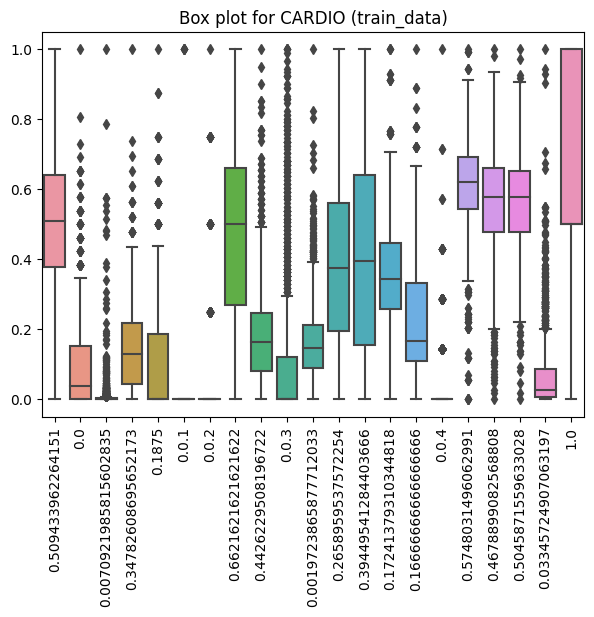

In [8]:
datasets = aeneas.dataset.list_datasets()
print("List of Datasets:", datasets)
selected_dataset = aeneas.configuration.config_data['dataset']['DS_INFO']['DS_NAME']
print("Selected dataset:", selected_dataset) 
aeneas.visualizer.plot_statistics(selected_dataset, 'train_data')

___________________

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
Auxiliary Functions<a class="anchor" id="test_2"></a>
    
</div>


In [10]:
# Initial Configuration:
import tests
def default_config():
    dim                 = 512
    hd_mode             = "DENSE"
    sparsity_factorx10  = 10
    parallel_features   = 1
    parallel_classes    = 1
    frame               = 64
    hvtype              = "BINARY"
    similarity          = "SIMI_DPROD"
    clip                = "CLIPPING_BINARY"
    lv_mode_model       = "LINEAR"
    bv_mode             = "BV_M_INT_MEM"
    lv_mode             = "LV_M_INT_MEM"
    cv_mode             = "CV_M_INT_MEM"
    hw_train            = 0
    retrain_in_hw       = 0
    encoding_technique  = "ENCODING_RECORD"
    n_gram              = 0
    n_gram_size         = 1
    lr                  = 10
    lr_decay            = "LR_CONSTANT"


    tests.change_config(aeneas=aeneas, dim=dim, hd_mode=hd_mode, sparsity_factorx10=sparsity_factorx10, parallel_features=parallel_features, parallel_classes=parallel_classes, frame=frame, 
                hvtype=hvtype, similarity=similarity, clip=clip, lv_mode_model=lv_mode_model, bv_mode=bv_mode,
                lv_mode=lv_mode, cv_mode=cv_mode, hw_train=hw_train, retrain_in_hw=retrain_in_hw,
                encoding_technique=encoding_technique, n_gram=n_gram,n_gram_size=n_gram_size, lr=lr, lr_decay=lr_decay)
default_config()
    

In [11]:
def single_range_plot(loaded_array, key_to_plot):
    # Define the metrics
    metrics = {
        'ModelEval Accuracy': [item['ModelEval']['accuracy'] for item in loaded_array],
        'HD_Eval Accuracy': [item['HD_Eval']['accuracy'] for item in loaded_array],
        'Total LUTs': [item['ResourceUtility']['Total LUTs'] for item in loaded_array],
        'Total FFs': [item['ResourceUtility']['Total FF'] for item in loaded_array],
        'CARRY8': [item['ResourceUtility']['CARRY8'] for item in loaded_array],
        'DSPs': [item['ResourceUtility']['DSPs'] for item in loaded_array],
        'Power (Dynamic W)': [item['PowerReport']['Dynamic (W)'] for item in loaded_array],
        'Power Device Static (W)': [item['PowerReport']['Device Static (W)'] for item in loaded_array],
        'Execution Time': [item['TimingReport'] for item in loaded_array],
        'Speed': [item['Speed'] for item in loaded_array]
    }
    
    # Extract unique values for the plotting key
    unique_values = sorted(set(item[key_to_plot] for item in loaded_array))

    print("Unique values:",unique_values)
    # Create a colormap
    cmap = plt.cm.viridis
    colors = [cmap(i / len(unique_values)) for i in range(len(unique_values))]

    # Create the bar plot
    num_metrics = len(metrics)
    fig, axes = plt.subplots(nrows=num_metrics, ncols=1, figsize=(8, 3 * num_metrics))

    for ax, (metric, values) in zip(axes, metrics.items()):
        for i, value in enumerate(unique_values):
            # Filter the data for each unique value
            filtered_data = [item[metric] for item in loaded_array if item[key_to_plot] == value]
            ax.bar(np.arange(len(filtered_data)) + i*(0.1), filtered_data, 0.1, color=colors[i], label=f'{value}')

        ax.set_ylabel(metric)
        ax.set_title(f'{metric} vs. {key_to_plot}')
        ax.set_xticks(np.arange(len(filtered_data)))
        ax.legend()

    plt.tight_layout()
    plt.show()

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
TEST 1: Hypervectors size (HD_DIM)<a class="anchor" id="test_2"></a>
    
</div>
<p><strong>Purpose:</strong> Assesses the impact of different HDV sizes on the model accuracy, the execution time and hardware resources<br>
<strong>Options:</strong> Varying HV sizes, such as 512, 1024, 2048.</p>



In [12]:
report_test1=tests.test_hd_dim(aeneas=aeneas, hd_dim_range=[128, 256, 512])
default_config()

Running sw model...
Called from runfile
------------------
HDC model:
Problem type: 0
Dataset: CARDIO
HV dimensionality: 128
HV data type: 0
HV mode: 0
HV level type: 0
HV level length: 32
HV similarity method: 1
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 1
N-gram: 0
N-gram size: 1
Retrain: 0
Epochs: 10
Learning rate: 10
Learning rate decay: 0
Beta learning rate: 3
------------------

-1  :  (0, 0)
0  :  (1, 1)
1  :  (2, 3)
2  :  (4, 6)
3  :  (7, 12)
4  :  (13, 24)
5  :  (25, 48)
6  :  (49, 64)
Classification problem
Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
------------------
Testing procedure:
Progress: 10.0 % ---> accuracy: 83.018867

Running sw model...
Called from runfile
------------------
HDC model:
Problem type: 0
Dataset: CARDIO
HV dimensionality: 256
HV data type: 0
HV mode: 0
HV level type: 0
HV level length: 32
HV similarity method: 1
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 1
N-gram: 0
N-gram size: 1
Retrain: 0
Epochs: 10
Learning rate: 10
Learning rate decay: 0
Beta learning rate: 3
------------------

-1  :  (0, 0)
0  :  (1, 1)
1  :  (2, 3)
2  :  (4, 6)
3  :  (7, 12)
4  :  (13, 24)
5  :  (25, 48)
6  :  (49, 64)
Classification problem
Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
------------------
Testing procedure:
Progress: 10.0 % ---> accuracy: 77.358490

Running sw model...
Called from runfile
------------------
HDC model:
Problem type: 0
Dataset: CARDIO
HV dimensionality: 512
HV data type: 0
HV mode: 0
HV level type: 0
HV level length: 32
HV similarity method: 1
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 1
N-gram: 0
N-gram size: 1
Retrain: 0
Epochs: 10
Learning rate: 10
Learning rate decay: 0
Beta learning rate: 3
------------------

-1  :  (0, 0)
0  :  (1, 1)
1  :  (2, 3)
2  :  (4, 6)
3  :  (7, 12)
4  :  (13, 24)
5  :  (25, 48)
6  :  (49, 64)
Classification problem
Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
------------------
Testing procedure:
Progress: 10.0 % ---> accuracy: 94.339622

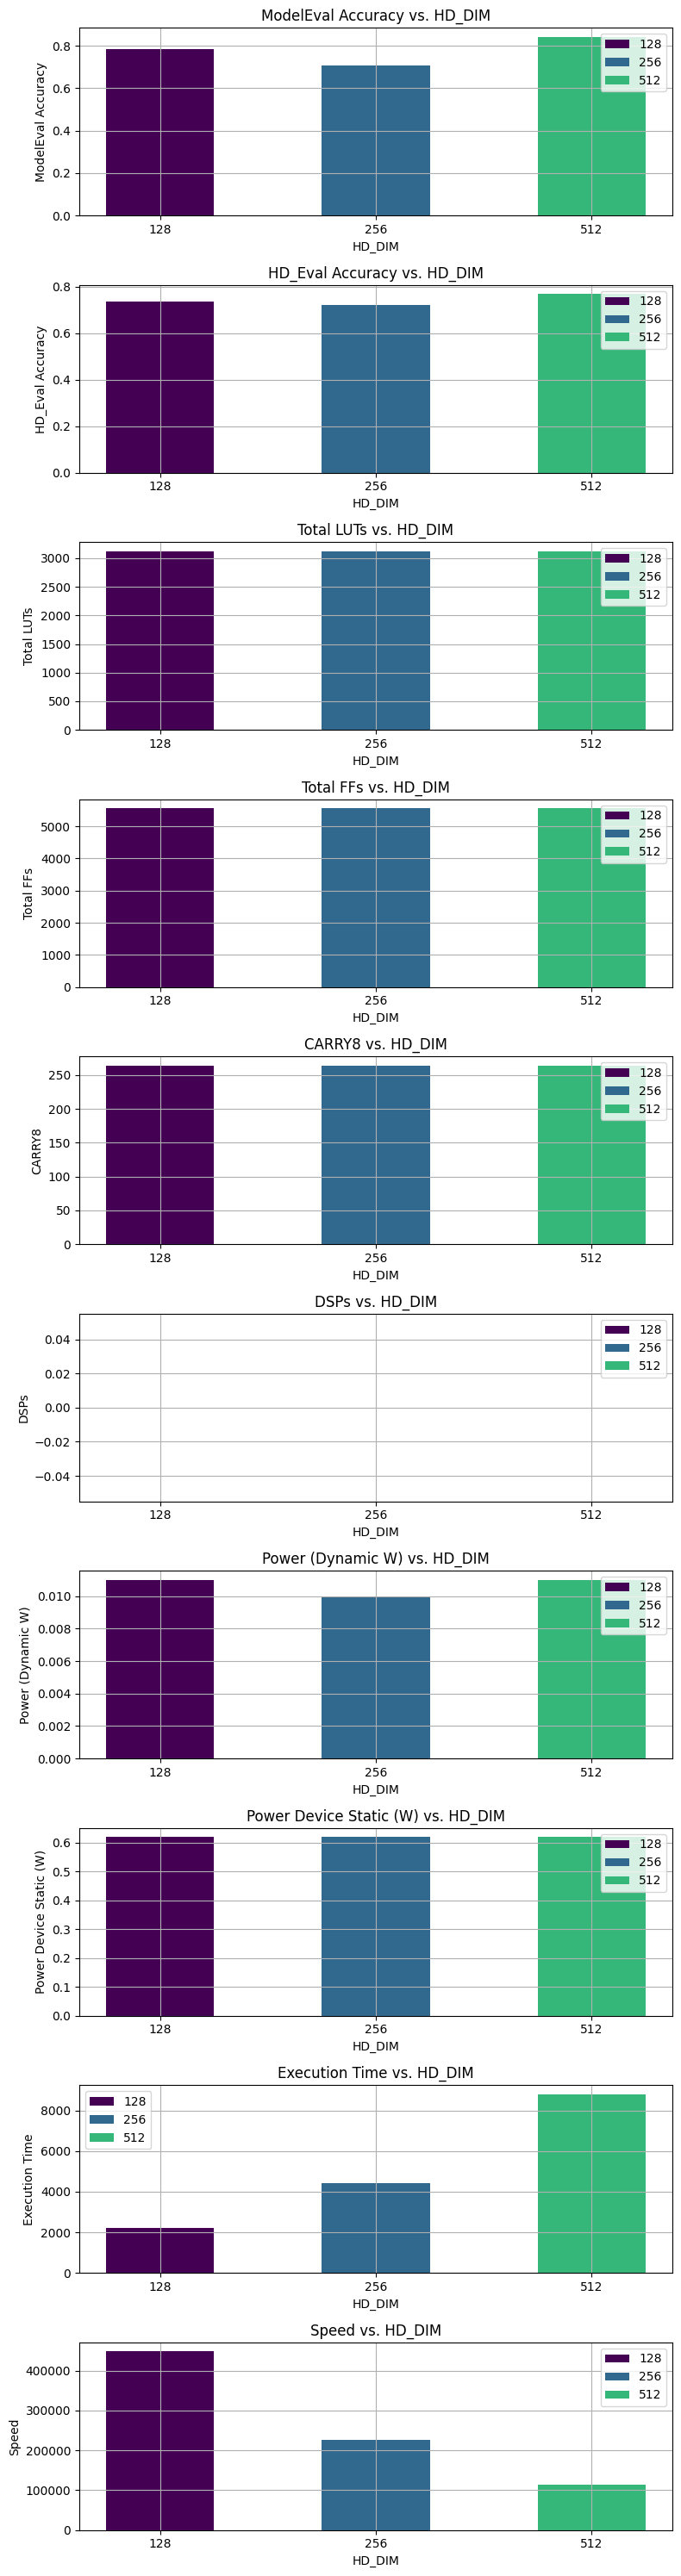

In [13]:
report_test1
# Plot
tests.single_range_plot(report_test1, 'HD_DIM')

In [14]:
report_test1


[{'ModelResults': None,
  'ModelEval': {'accuracy': 0.7838345864661654,
   'precision': 0.6275917179098713,
   'recall': 0.5013821138211382,
   'f1_score': 0.5256182743711841,
   'roc_auc': 0.6342850202513258,
   'confusion_matrix': [[383, 3, 24], [45, 18, 9], [30, 4, 16]]},
  'HD_Eval': {'accuracy': 0.734962,
   'precision': 0.582594,
   'recall': 0.701631,
   'f1_score': 0.615465,
   'confusion_matrix': [[307, 60, 43], [11, 53, 8], [9, 10, 31]]},
  'ResourceUtility': {'LUT as Logic': 3121,
   'LUT as Memory': 0,
   'CLB Registers': 2781,
   'Register as Flip Flop': 2781,
   'Register as Latch': 0,
   'CARRY8': 264,
   'DSPs': 0,
   'Total LUTs': 3121,
   'Total FF': 5562},
  'PowerReport': {'Dynamic (W)': 0.011, 'Device Static (W)': 0.62},
  'TimingReport': 2230.0,
  'Speed': 448430.4932735426,
  'HD_DIM': 128},
 {'ModelResults': None,
  'ModelEval': {'accuracy': 0.706766917293233,
   'precision': 0.5486107997876026,
   'recall': 0.6398193315266486,
   'f1_score': 0.5665450140481803,

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
TEST 2: HV type <a class="anchor" id="test_3"></a>
    
</div>
<p><strong>Purpose:</strong> Analyzes performance with different HV types.<br>
<strong>Options:</strong> `BINARY` (0) and `BIPOLAR` (1).</p>
This test should verify that, using the same similarity measure (cosine), the HW is the same. Since bipolarHVs are treated as binary one in hw.

In [13]:
report_test3 = tests.test_hd_type(aeneas, hd_type_options = ["BINARY", "BIPOLAR"]) 
# default_config()

Running sw model...
------------------
HDC model:
Dataset: CARDIO
HV dimensionality: 512
HV data type: 0
HV mode: 0
HV level type: 0
HV level length: 32
HV similarity method: 1
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 1
N-gram: 0
N-gram size: 1
Retrain: 0
Epochs: 10
Learning rate: 10
Learning rate decay: 0
Beta learning rate: 3
------------------

Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
------------------
Testing procedure:
Progress: 10.0 % ---> accuracy: 92.45283018867924 %
Progress: 20.0 % ---> accuracy: 86.79245283018868 %
Progress: 30.0 % ---> accuracy: 81.13207547169812 %
Progress: 40.0 % ---> accuracy: 79.71698113207547 %
Prog

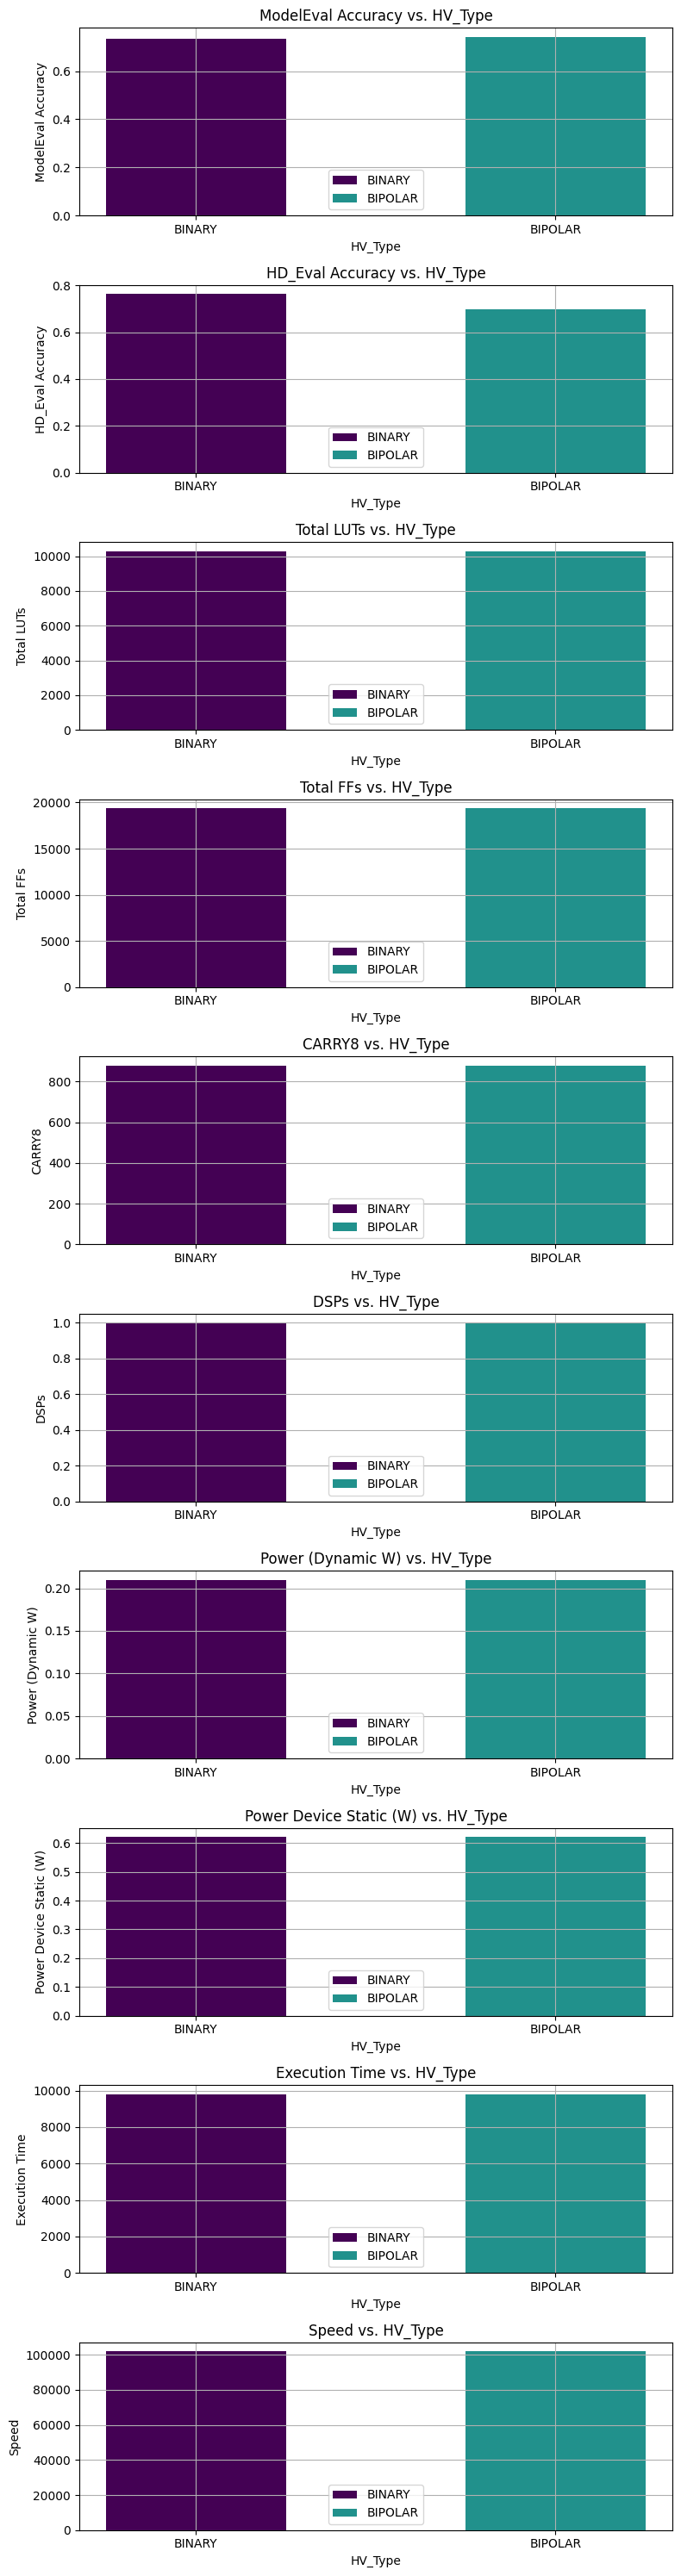

In [19]:
# Plot
tests.single_range_plot(report_test3, 'HV_Type')

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
TEST 3: Frame Parallelism (FRAME) <a class="anchor" id="test_5"></a>
</div>
<p><strong>Purpose:</strong> Tests different numbers of HV elements processed in parallel.<br>
<strong>Options:</strong> Varying frame sizes, e.g., 256, 512.</p>



In [15]:
report_test5 = tests.test_frame_parallelism(aeneas, frame_range = [32, 64, 128], dim = 512)
default_config()

Running sw model...
Called from runfile
------------------
HDC model:
Problem type: 0
Dataset: CARDIO
HV dimensionality: 512
HV data type: 0
HV mode: 0
HV level type: 0
HV level length: 32
HV similarity method: 1
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 1
N-gram: 0
N-gram size: 1
Retrain: 0
Epochs: 10
Learning rate: 10
Learning rate decay: 0
Beta learning rate: 3
------------------

-1  :  (0, 0)
0  :  (1, 1)
1  :  (2, 3)
2  :  (4, 6)
3  :  (7, 12)
4  :  (13, 24)
5  :  (25, 48)
6  :  (49, 64)
Classification problem
Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
------------------
Testing procedure:
Progress: 10.0 % ---> accuracy: 84.905660

Running HW model...
Simulation finished...running synthesis


Running HW model...
Simulation finished...running synthesis


In [16]:
# For this test the fostware model is run only once
addition = {
    'ModelResults': report_test5[0]['ModelResults'],
    'ModelEval': report_test5[0]['ModelEval']
}
addition.update(report_test5[1])

report_test5[1]=addition

addition = {
    'ModelResults': report_test5[0]['ModelResults'],
    'ModelEval': report_test5[0]['ModelEval']
}
addition.update(report_test5[2])
report_test5[2]=addition


In [17]:
report_test5

[{'ModelResults': None,
  'ModelEval': {'accuracy': 0.7518796992481203,
   'precision': 0.6085955996711145,
   'recall': 0.7224345076784101,
   'f1_score': 0.6401154792833416,
   'roc_auc': 0.7969384263119442,
   'confusion_matrix': [[313, 62, 35], [15, 55, 2], [2, 16, 32]]},
  'HD_Eval': {'accuracy': 0.729323,
   'precision': 0.599445,
   'recall': 0.716495,
   'f1_score': 0.62597,
   'confusion_matrix': [[300, 76, 34], [14, 56, 2], [2, 16, 32]]},
  'ResourceUtility': {'LUT as Logic': 2676,
   'LUT as Memory': 0,
   'CLB Registers': 1549,
   'Register as Flip Flop': 1549,
   'Register as Latch': 0,
   'CARRY8': 136,
   'DSPs': 0,
   'Total LUTs': 2676,
   'Total FF': 3098},
  'PowerReport': {'Dynamic (W)': 0.015, 'Device Static (W)': 0.62},
  'TimingReport': 14920.0,
  'Speed': 67024.12868632708,
  'Frame': 32},
 {'ModelResults': None,
  'ModelEval': {'accuracy': 0.7518796992481203,
   'precision': 0.6085955996711145,
   'recall': 0.7224345076784101,
   'f1_score': 0.6401154792833416,

In [23]:
import sys
import json
from datetime import datetime
import numpy as np 
import matplotlib.pyplot as plt
from main import Aeneas
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def single_range_plot(loaded_array, data_to_plot):
    # Define the metrics
    metrics = {
        'ModelEval Accuracy': [item['ModelEval']['accuracy'] for item in loaded_array],
        'HD_Eval Accuracy': [item['HD_Eval']['accuracy'] for item in loaded_array],
        'Total LUTs': [item['ResourceUtility']['Total LUTs'] for item in loaded_array],
        'Total FFs': [item['ResourceUtility']['Total FF'] for item in loaded_array],
        'CARRY8': [item['ResourceUtility']['CARRY8'] for item in loaded_array],
        'DSPs': [item['ResourceUtility']['DSPs'] for item in loaded_array],
        'Power (Dynamic W)': [item['PowerReport']['Dynamic (W)'] for item in loaded_array],
        'Power Device Static (W)': [item['PowerReport']['Device Static (W)'] for item in loaded_array],
        'Execution Time': [item['TimingReport'] for item in loaded_array],
        'Speed': [item['Speed'] for item in loaded_array]
    }
    # Extract unique 'Frame' values
    frame_values = sorted(set(item[data_to_plot] for item in loaded_array))
    print(frame_values)
    # Create a colormap
    cmap = plt.cm.viridis
    colors = [cmap(i / len(frame_values)) for i in range(len(frame_values))]

    # Create the bar plot
    num_metrics = len(metrics)
    fig, axes = plt.subplots(nrows=num_metrics, ncols=1, figsize=(8, 3 * num_metrics))

    for ax, metric_name in zip(axes, metrics):
        x = np.arange(len(frame_values))
        bar_width = 0.5
        legends = [f'{frame}' for frame in frame_values]

        ax.bar(x, metrics[metric_name], bar_width, label=legends, color=colors)
        ax.set_xlabel(data_to_plot)
        ax.set_ylabel(metric_name)
        ax.set_title(f'{metric_name} vs. {data_to_plot}')
        ax.set_xticks(x)
        ax.set_xticklabels(frame_values)  # Set the 'Frame' values as x-axis labels
        ax.legend()
        
        ax.grid(True)

    plt.tight_layout()
    plt.show()

[32, 64, 128]


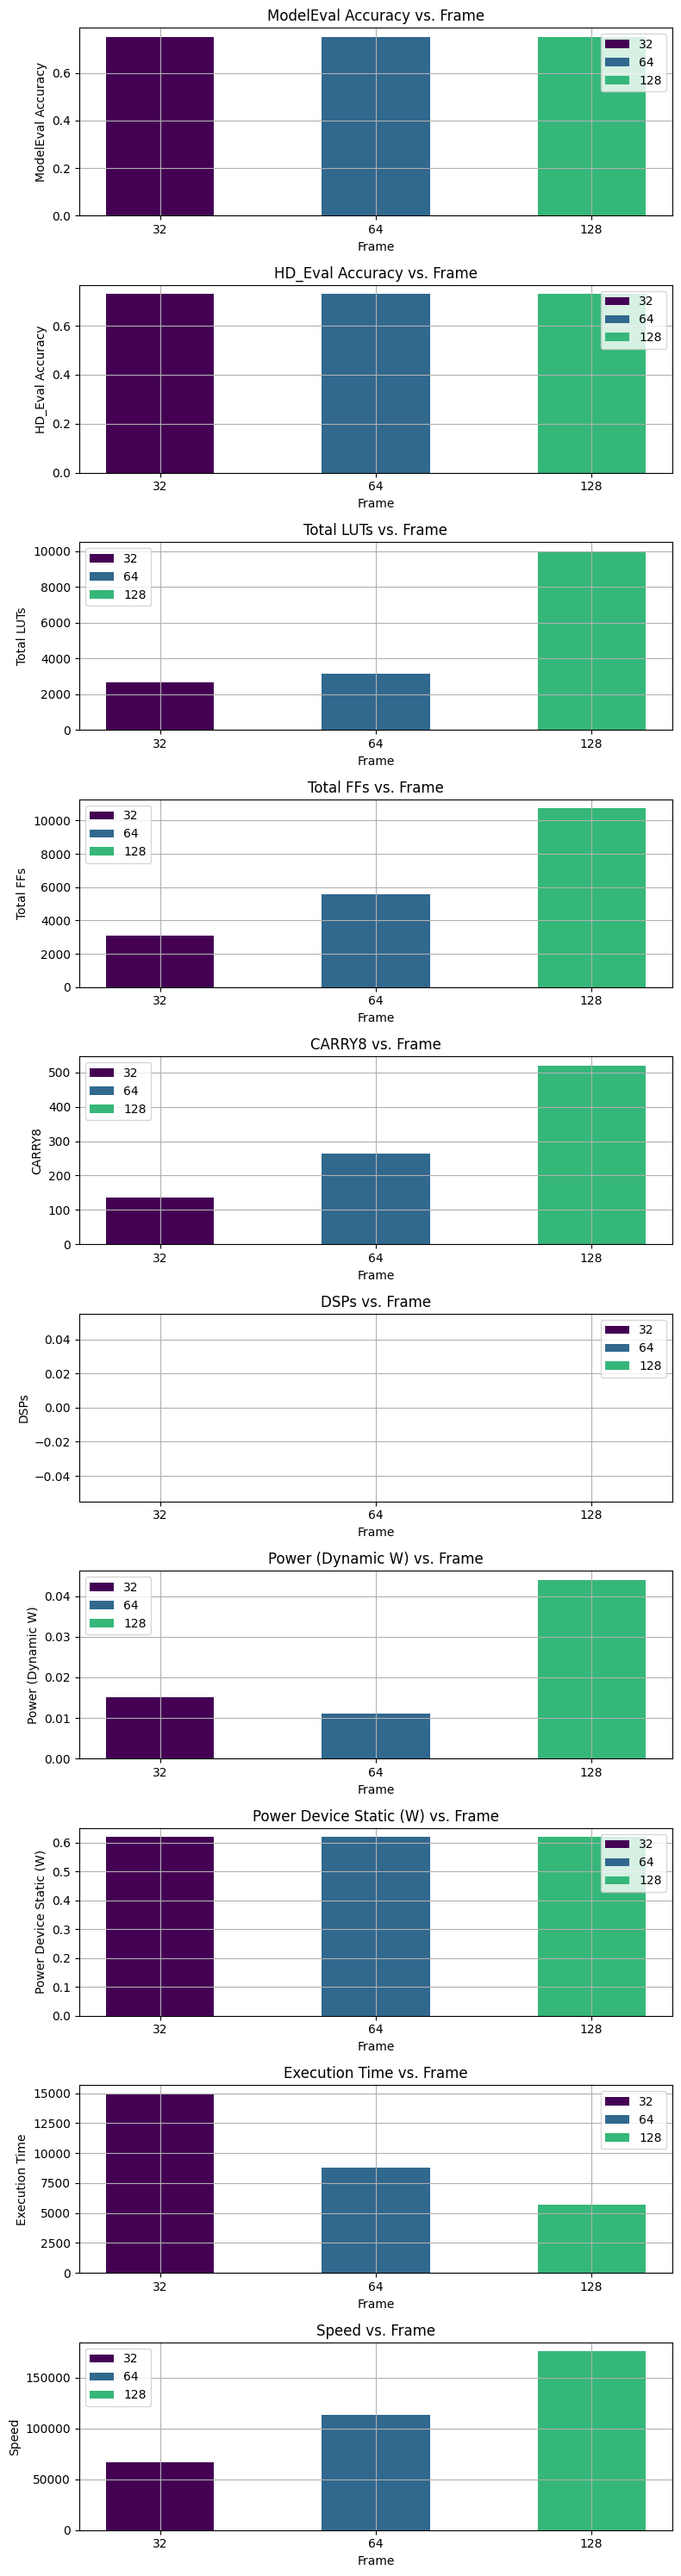

In [25]:
# Plot
import matplotlib.pyplot as plt
single_range_plot(report_test5, 'Frame')

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
Test 6: Feature Parallelism (PARALLELISM_FEATURES) <a class="anchor" id="test_6"></a>
</div>
<p><strong>Purpose:</strong> Assesses parallel processing of features.<br>
<strong>Options:</strong> Different levels of feature parallelism, e.g., 1, 2.</p>

In [9]:
default_config()
report_test6 = tests.test_feature_parallelism(aeneas, parallel_features_range = [1,3, 7])

Running sw model...
------------------
HDC model:
Dataset: CARDIO
HV dimensionality: 512
HV data type: 0
HV mode: 0
HV level type: 0
HV level length: 32
HV similarity method: 1
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 1
N-gram: 0
N-gram size: 1
Retrain: 0
Epochs: 10
Learning rate: 10
Learning rate decay: 0
Beta learning rate: 3
------------------

Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
------------------
Testing procedure:
Progress: 10.0 % ---> accuracy: 73.58490566037736 %
Progress: 20.0 % ---> accuracy: 69.81132075471699 %
Progress: 30.0 % ---> accuracy: 67.29559748427673 %
Progress: 40.0 % ---> accuracy: 66.0377358490566 %
Progr

In [10]:
# For this test the fostware model is run only once
addition = {
    'ModelResults': report_test6[0]['ModelResults'],
    'ModelEval': report_test6[0]['ModelEval']
}
addition.update(report_test6[1])

report_test6[1]=addition

addition = {
    'ModelResults': report_test6[0]['ModelResults'],
    'ModelEval': report_test6[0]['ModelEval']
}
addition.update(report_test6[2])
report_test6[2]=addition

addition = {
    'ModelResults': report_test6[0]['ModelResults'],
    'ModelEval': report_test6[0]['ModelEval']
}


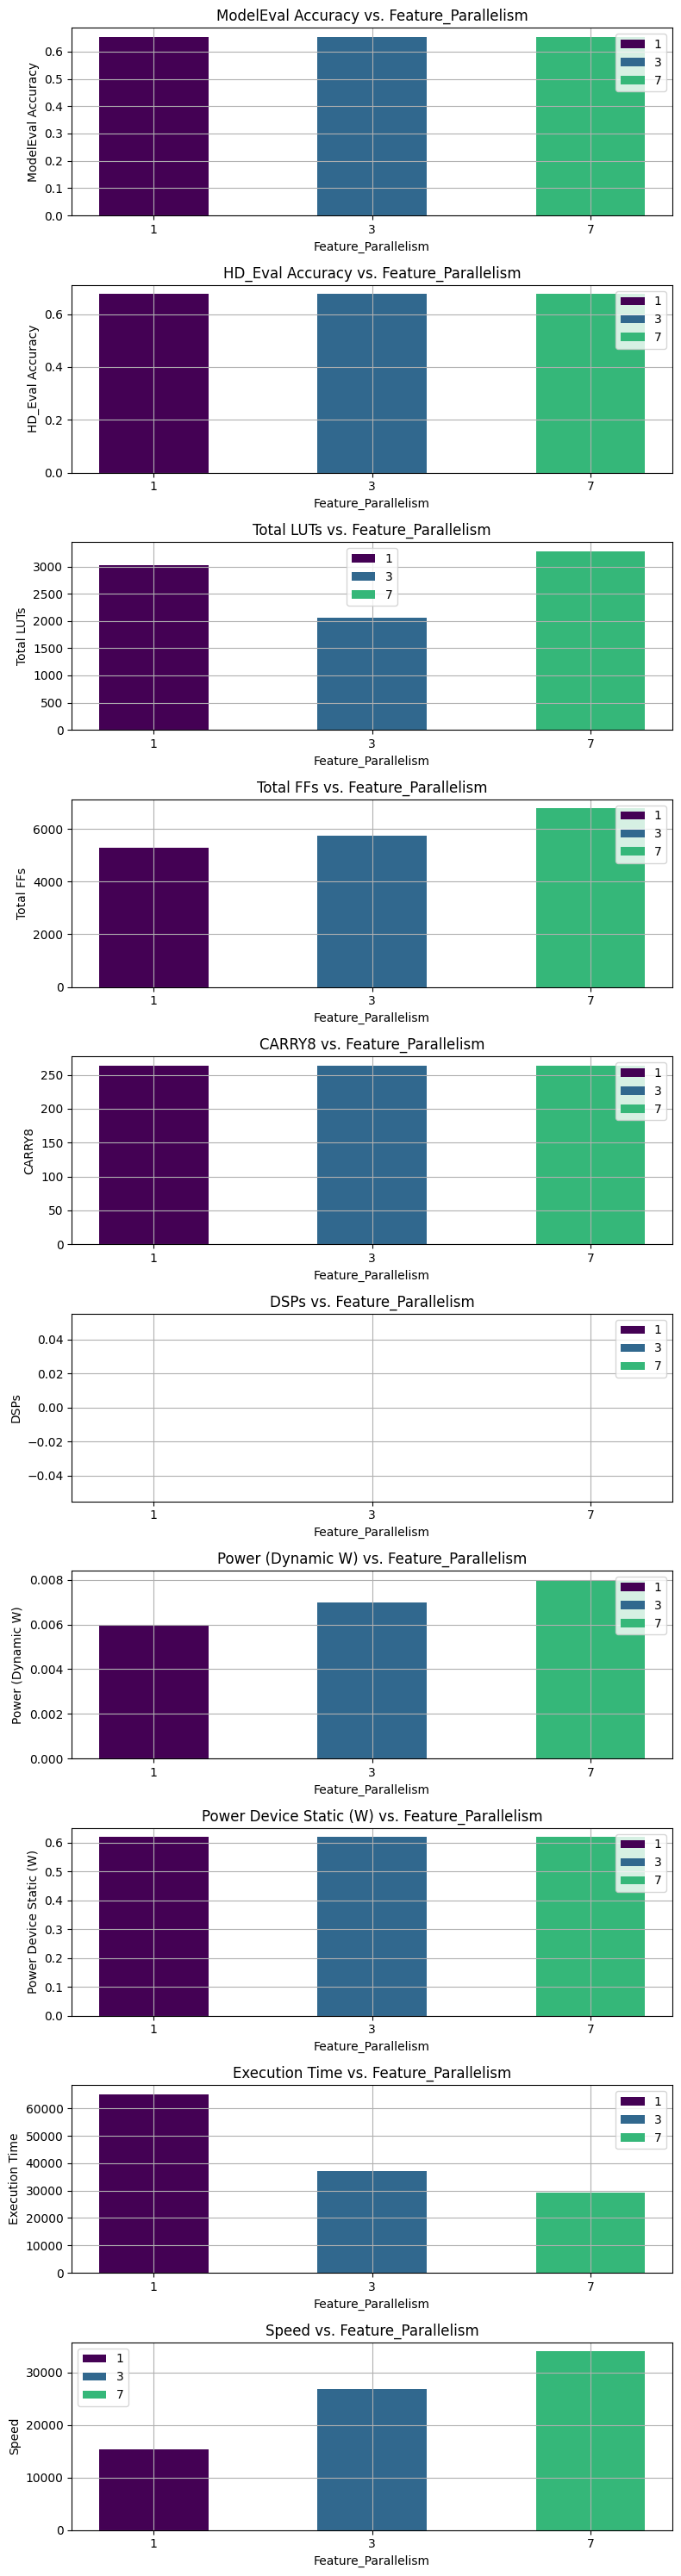

In [11]:
# Plot


tests.single_range_plot(report_test6, 'Feature_Parallelism')

In [12]:
report_test6

[{'ModelResults': None,
  'ModelEval': {'accuracy': 0.6541353383458647,
   'precision': 0.545364820953425,
   'recall': 0.6954245709123758,
   'f1_score': 0.5609501720767982,
   'roc_auc': 0.7711779572186334,
   'confusion_matrix': [[257, 84, 69], [11, 59, 2], [0, 18, 32]]},
  'HD_Eval': {'accuracy': 0.676692,
   'precision': 0.55182,
   'recall': 0.695768,
   'f1_score': 0.574318,
   'confusion_matrix': [[272, 64, 74], [14, 55, 3], [0, 17, 33]]},
  'ResourceUtility': {'LUT as Logic': 3030,
   'LUT as Memory': 0,
   'CLB Registers': 2634,
   'Register as Flip Flop': 2634,
   'Register as Latch': 0,
   'CARRY8': 264,
   'DSPs': 0,
   'Total LUTs': 3030,
   'Total FF': 5268},
  'PowerReport': {'Dynamic (W)': 0.006, 'Device Static (W)': 0.62},
  'TimingReport': 65200.0,
  'Speed': 15337.423312883435,
  'Feature_Parallelism': 1},
 {'ModelResults': None,
  'ModelEval': {'accuracy': 0.6541353383458647,
   'precision': 0.545364820953425,
   'recall': 0.6954245709123758,
   'f1_score': 0.56095

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
Test 7: Class Parallelism (PARALLELISM_CLASS) <a class="anchor" id="test_7"></a>
</div>
<p><strong>Purpose:</strong> Evaluates parallel processing of classes.<br>
<strong>Options:</strong> Different levels of class parallelism, e.g., 2, 4.</p>

In [6]:
default_config()
report_test7 = tests.test_class_parallelism(aeneas, parallel_classes_range = [1,3])

Running sw model...
------------------
HDC model:
Dataset: CARDIO
HV dimensionality: 512
HV data type: 0
HV mode: 0
HV level type: 0
HV level length: 32
HV similarity method: 1
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 1
N-gram: 0
N-gram size: 1
Retrain: 0
Epochs: 10
Learning rate: 10
Learning rate decay: 0
Beta learning rate: 3
------------------

Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
------------------
Testing procedure:
Progress: 10.0 % ---> accuracy: 77.35849056603773 %
Progress: 20.0 % ---> accuracy: 75.47169811320755 %
Progress: 30.0 % ---> accuracy: 74.21383647798743 %
Progress: 40.0 % ---> accuracy: 73.11320754716981 %
Prog

In [7]:
report_test7

[{'ModelResults': None,
  'ModelEval': {'accuracy': 0.6823308270676691,
   'precision': 0.5681922451401633,
   'recall': 0.7287398373983741,
   'f1_score': 0.5885106135052728,
   'roc_auc': 0.7992435692149265,
   'confusion_matrix': [[267, 79, 64], [5, 63, 4], [0, 17, 33]]},
  'HD_Eval': {'accuracy': 0.716165,
   'precision': 0.593489,
   'recall': 0.741337,
   'f1_score': 0.620056,
   'confusion_matrix': [[285, 80, 45], [7, 64, 1], [1, 17, 32]]},
  'ResourceUtility': {'LUT as Logic': 3030,
   'LUT as Memory': 0,
   'CLB Registers': 2634,
   'Register as Flip Flop': 2634,
   'Register as Latch': 0,
   'CARRY8': 264,
   'DSPs': 0,
   'Total LUTs': 3030,
   'Total FF': 5268},
  'PowerReport': {'Dynamic (W)': 0.006, 'Device Static (W)': 0.62},
  'TimingReport': 65200.0,
  'Speed': 15337.423312883435,
  'Class_Parallelism': 1},
 {'HD_Eval': {'accuracy': 0.770677,
   'precision': 0.256892,
   'recall': 0.333333,
   'f1_score': 0.290163,
   'confusion_matrix': [[410, 0, 0], [72, 0, 0], [50, 

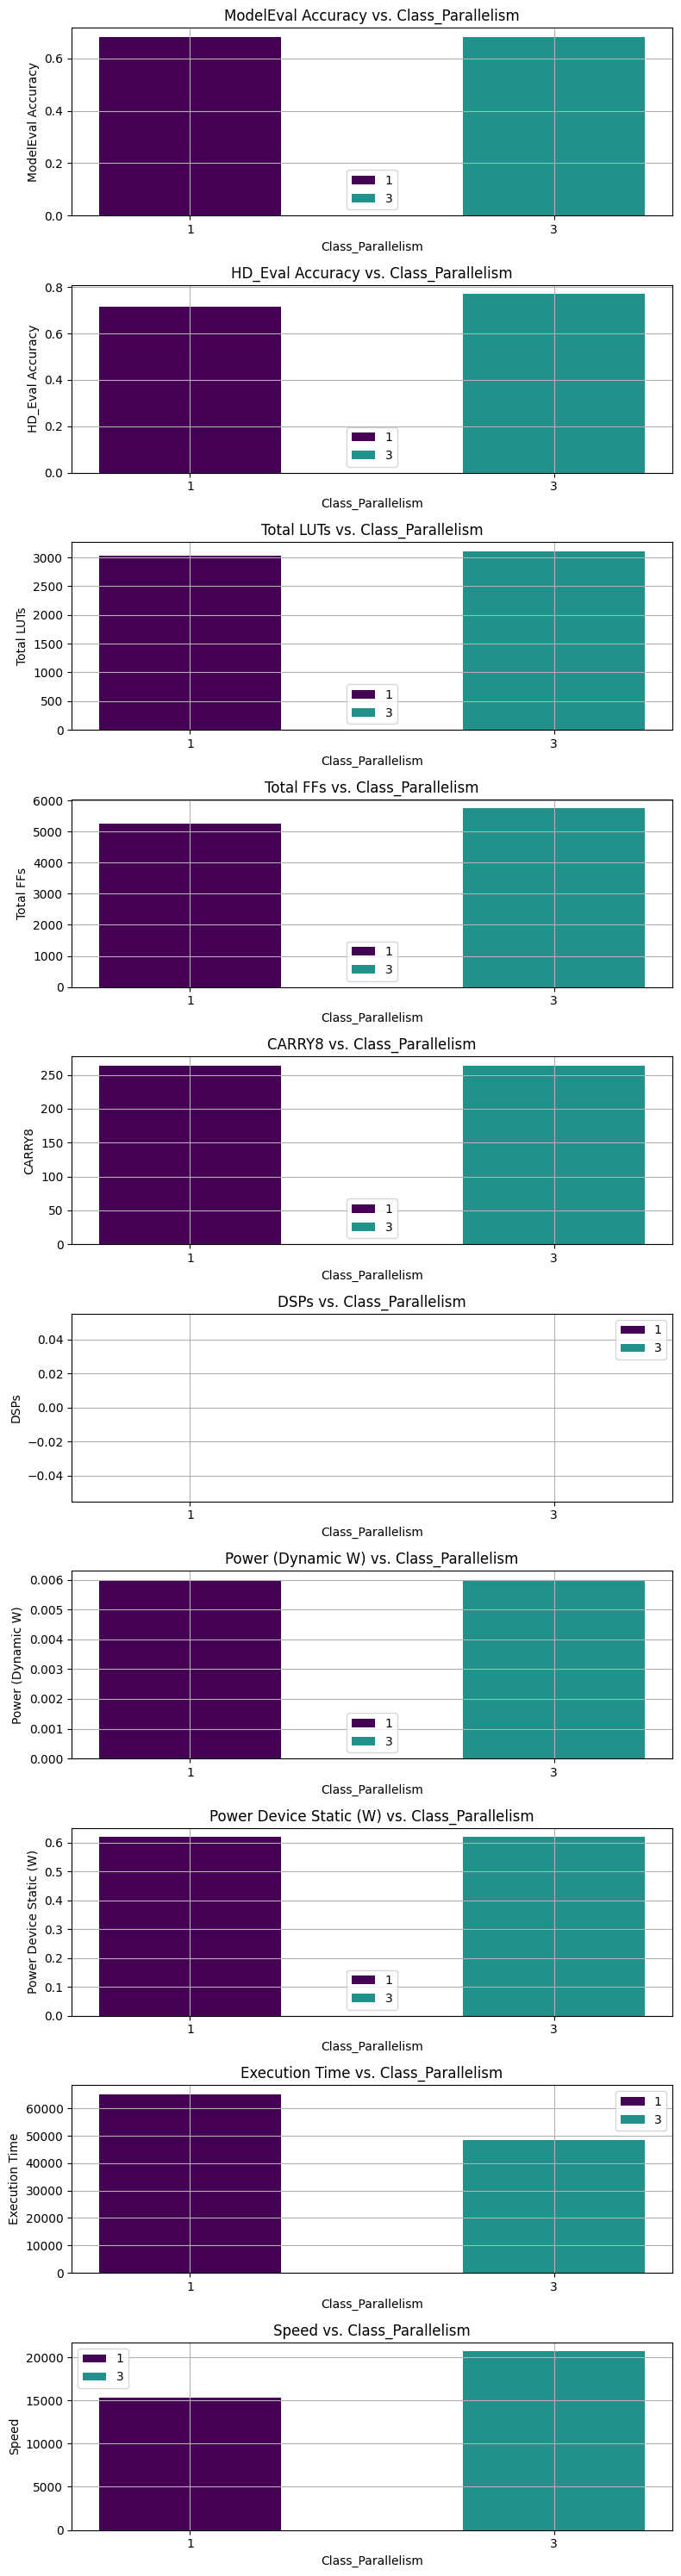

In [8]:
# Plot
# For this test the fostware model is run only once
addition = {
    'ModelResults': report_test7[0]['ModelResults'],
    'ModelEval': report_test7[0]['ModelEval']
}
addition.update(report_test7[1])

report_test7[1]=addition

tests.single_range_plot(report_test7, 'Class_Parallelism')

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
TEST 8: Level Vector Mode (LV_MODE_MODEL) <a class="anchor" id="test_8"></a>
</div>
<p><strong>Purpose:</strong> Tests different Level Vector modes.<br>
<strong>Options:</strong> Modes like `LINEAR`, `APPROX`, `THERMOMETER`.</p>




In [26]:
default_config()
report_test8 = tests.test_lv_mode_model(aeneas, lv_mode_model_options = ["LINEAR", "APPROX", "THERMOMETER"])
default_config()

Running sw model...
Called from runfile
------------------
HDC model:
Problem type: 0
Dataset: CARDIO
HV dimensionality: 512
HV data type: 0
HV mode: 0
HV level type: 0
HV level length: 32
HV similarity method: 1
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 1
N-gram: 0
N-gram size: 1
Retrain: 0
Epochs: 10
Learning rate: 10
Learning rate decay: 0
Beta learning rate: 3
------------------

-1  :  (0, 0)
0  :  (1, 1)
1  :  (2, 3)
2  :  (4, 6)
3  :  (7, 12)
4  :  (13, 24)
5  :  (25, 48)
6  :  (49, 64)
Classification problem
Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
------------------
Testing procedure:
Progress: 10.0 % ---> accuracy: 90.566037

Running sw model...
Called from runfile
------------------
HDC model:
Problem type: 0
Dataset: CARDIO
HV dimensionality: 512
HV data type: 0
HV mode: 0
HV level type: 1
HV level length: 32
HV similarity method: 1
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 1
N-gram: 0
N-gram size: 1
Retrain: 0
Epochs: 10
Learning rate: 10
Learning rate decay: 0
Beta learning rate: 3
------------------

-1  :  (0, 0)
0  :  (1, 1)
1  :  (2, 3)
2  :  (4, 6)
3  :  (7, 12)
4  :  (13, 24)
5  :  (25, 48)
6  :  (49, 64)
Classification problem
Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
------------------
Testing procedure:
Progress: 10.0 % ---> accuracy: 90.566037

Running sw model...
Called from runfile
------------------
HDC model:
Problem type: 0
Dataset: CARDIO
HV dimensionality: 512
HV data type: 0
HV mode: 0
HV level type: 2
HV level length: 32
HV similarity method: 1
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 1
N-gram: 0
N-gram size: 1
Retrain: 0
Epochs: 10
Learning rate: 10
Learning rate decay: 0
Beta learning rate: 3
------------------

-1  :  (0, 0)
0  :  (1, 1)
1  :  (2, 3)
2  :  (4, 6)
3  :  (7, 12)
4  :  (13, 24)
5  :  (25, 48)
6  :  (49, 64)
Classification problem
Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
------------------
Testing procedure:
Progress: 10.0 % ---> accuracy: 90.566037

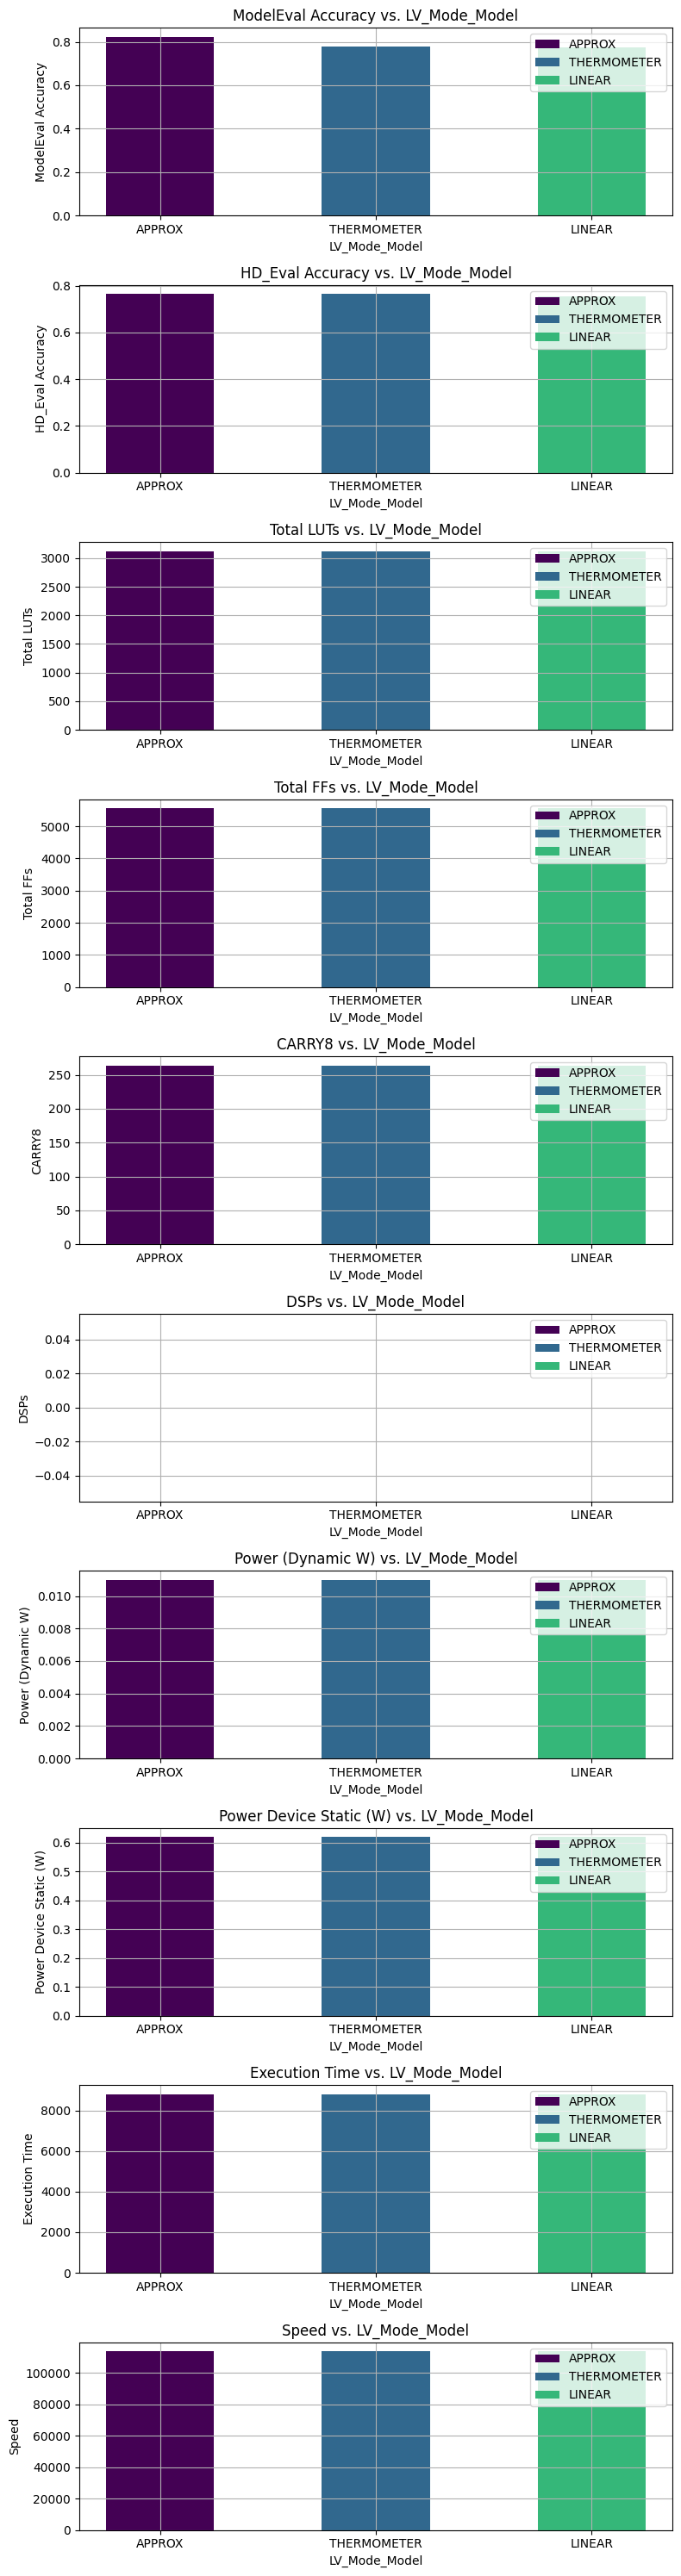

In [30]:
# Plot
tests.single_range_plot(report_test8, 'LV_Mode_Model')

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
Test 11: Training on Hardware (TRAIN_ON_HW) <a class="anchor" id="test_11"></a>
</div>
<p><strong>Purpose:</strong> Assesses hardware training's effect.<br>
<strong>Options:</strong> Enable (1) or disable (0) hardware training.</p>



In [ ]:
report_test11 = tests.test_hw_train(aeneas, hw_train_options=[0,1])
default_config()

Running sw model...
Called from runfile
------------------
HDC model:
Problem type: 0
Dataset: CARDIO
HV dimensionality: 512
HV data type: 0
HV mode: 0
HV level type: 0
HV level length: 32
HV similarity method: 1
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 1
N-gram: 0
N-gram size: 1
Retrain: 0
Epochs: 10
Learning rate: 10
Learning rate decay: 0
Beta learning rate: 3
------------------

-1  :  (0, 0)
0  :  (1, 1)
1  :  (2, 3)
2  :  (4, 6)
3  :  (7, 12)
4  :  (13, 24)
5  :  (25, 48)
6  :  (49, 64)
Classification problem
Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
------------------
Testing procedure:
Progress: 10.0 % ---> accuracy: 75.471698

In [ ]:
# Plot
tests.single_range_plot(report_test11, 'TRAIN_ON_HW')

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
Test 12: Retraining on Hardware (RETRAIN_ON_HW) <a class="anchor" id="test_12"></a>
</div>
<p><strong>Purpose:</strong> Tests the impact of retraining on hardware.<br>
<strong>Options:</strong> Enable (1) or disable (0) retraining on hardware.</p>




In [ ]:
report_test12 = tests.test_retrain_in_hw(aeneas, retrain_in_hw_options=[0,1])
default_config()

In [ ]:
# Plot
tests.single_range_plot(report_test12, 'RETRAIN_ON_HW')

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
Test 13: Spatial Encoding (ENCODING_TECHNIQUE) <a class="anchor" id="test_13"></a>
</div>
<p><strong>Purpose:</strong> Evaluates different spatial encoding techniques.<br>
<strong>Options:</strong> Techniques like `ENCODING_RECORD`, `ENCODING_NGRAM`.</p>

In [6]:
report_test13 = tests.test_spatial_encoding(aeneas, encoding_technique_options = ["ENCODING_RECORD", "ENCODING_NGRAM"])
default_config()

Running sw model...
------------------
HDC model:
Dataset: CARDIO
HV dimensionality: 512
HV data type: 0
HV mode: 0
HV level type: 0
HV level length: 32
HV similarity method: 1
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 1
N-gram: 0
N-gram size: 1
Retrain: 0
Epochs: 10
Learning rate: 10
Learning rate decay: 0
Beta learning rate: 3
------------------

Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
------------------
Testing procedure:
Progress: 10.0 % ---> accuracy: 81.13207547169812 %
Progress: 20.0 % ---> accuracy: 75.47169811320755 %
Progress: 30.0 % ---> accuracy: 72.95597484276729 %
Progress: 40.0 % ---> accuracy: 73.11320754716981 %
Prog

In [7]:
report_test13

[{'ModelResults': None,
  'ModelEval': {'accuracy': 0.6954887218045113,
   'precision': 0.5608294489585557,
   'recall': 0.6652168021680217,
   'f1_score': 0.5804573082120813,
   'roc_auc': 0.7555350924556912,
   'confusion_matrix': [[290, 84, 36], [15, 51, 6], [4, 17, 29]]},
  'HD_Eval': {'accuracy': 0.736842,
   'precision': 0.606738,
   'recall': 0.679286,
   'f1_score': 0.622096,
   'confusion_matrix': [[313, 74, 23], [20, 50, 2], [5, 16, 29]]},
  'ResourceUtility': {'LUT as Logic': 3030,
   'LUT as Memory': 0,
   'CLB Registers': 2634,
   'Register as Flip Flop': 2634,
   'Register as Latch': 0,
   'CARRY8': 264,
   'DSPs': 0,
   'Total LUTs': 3030,
   'Total FF': 5268},
  'PowerReport': {'Dynamic (W)': 0.006, 'Device Static (W)': 0.62},
  'TimingReport': 65200.0,
  'Speed': 15337.423312883435,
  'Spatial_Encoding': 'ENCODING_RECORD'},
 {'ModelResults': None,
  'ModelEval': {'accuracy': 0.5093984962406015,
   'precision': 0.6558397742608268,
   'recall': 0.5249051490514904,
   'f1

In [9]:
backup=report_test13

In [11]:
# Adding Memory_requirements plot
num_bv = aeneas.configuration.config_data['dataset']['DS_INFO']['DS_FEATURE_SIZE']
i['Memory Requirements'] = memory_requirements/8

    
    

KeyError: 'Dimension'

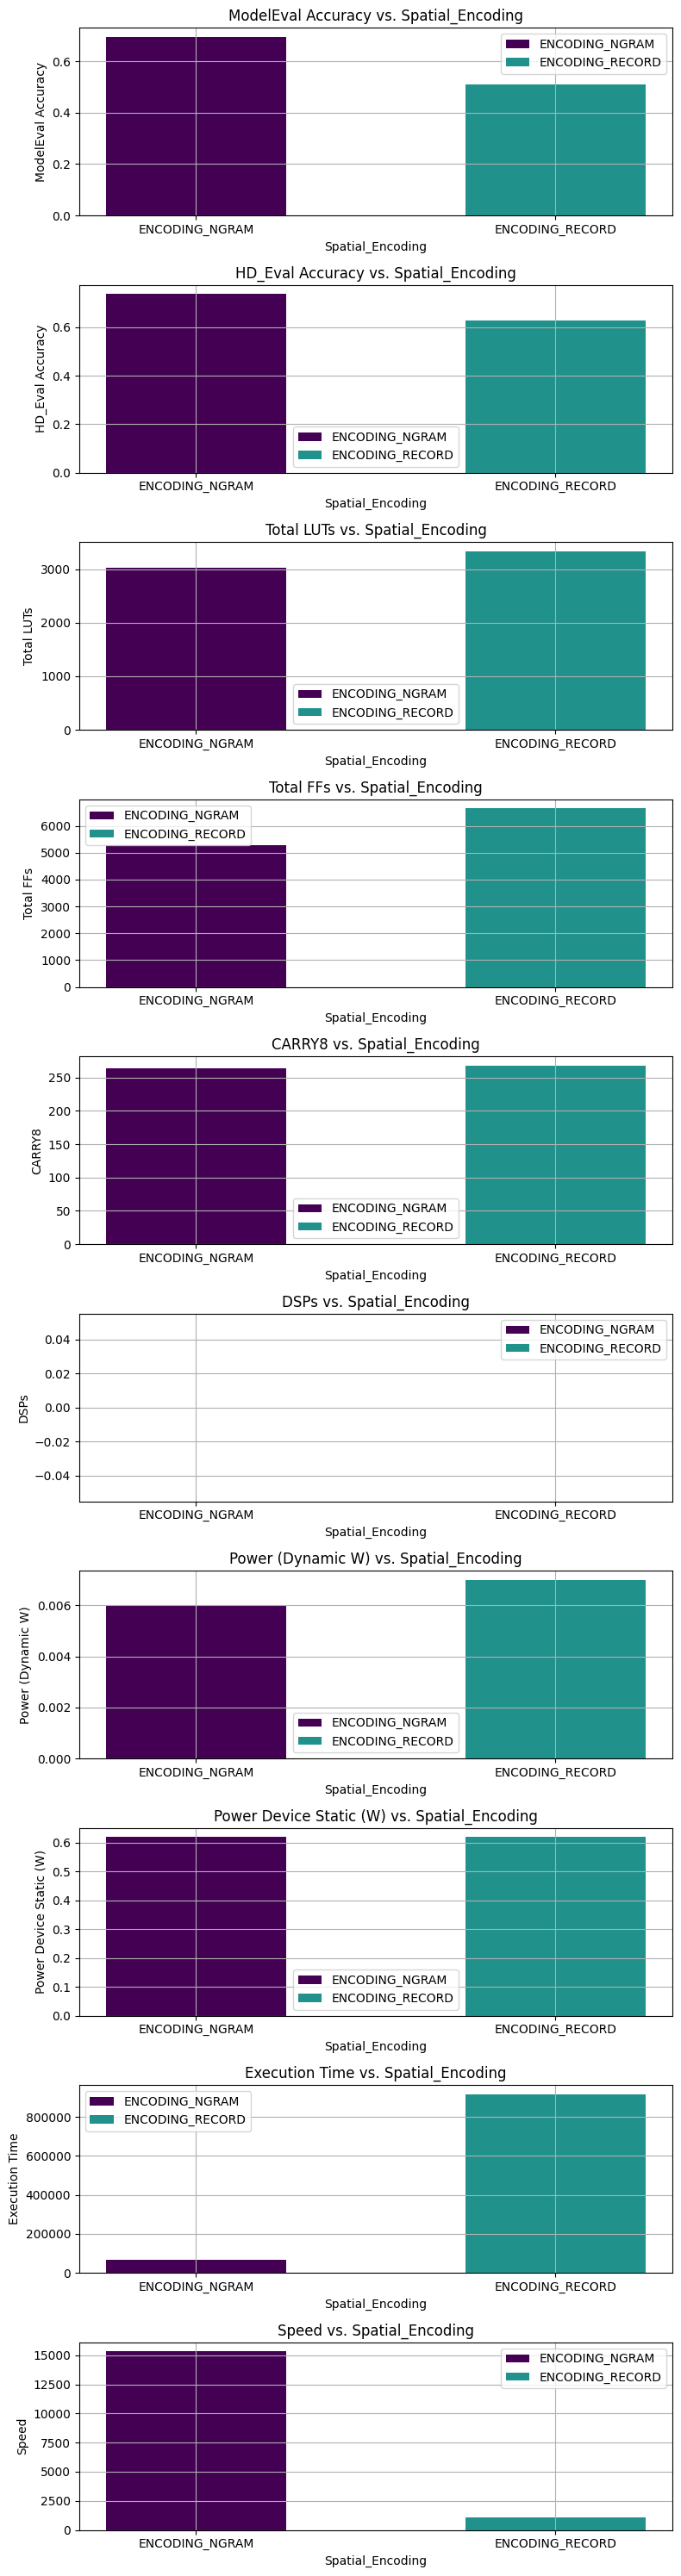

In [8]:
# Plot
tests.single_range_plot(report_test13, 'Spatial_Encoding')

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
Test 14: Temporal Encoding (N_GRAM_SIZE)<a class="anchor" id="test_14"></a>
</div>
<p><strong>Purpose:</strong> Investigates different n-gram sizes for temporal encoding.<br>
<strong>Options:</strong> Various n-gram sizes, e.g., 2, 3.</p>




In [ ]:
report_test14 = tests.test_temporal_encoding(aeneas, n_gram_size_options = [2,3,4,5])
default_config()

In [ ]:
# Plot
tests.single_range_plot(report_test14, 'NGRAM_SIZE')

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
Test 15: Clipping Techniques (CLIPPING_CLASS) <a class="anchor" id="test_15"></a>
</div>
<p><strong>Purpose:</strong> Analyzes effects of different clipping techniques.<br>
<strong>Options:</strong> Methods like `CLIPPING_BINARY`, `CLIPPING_TERNARY`, `CLIPPING_QUANTIZED`.</p>




In [ ]:
report_test15 = tests.test_clipping_techniques(aeneas, clipping_options = ["CLIPPING_BINARY", "CLIPPING_QUANTIZED", "CLIPPING_POWERTWO", "CLIPPING_QUANTIZED_POWERTWO", "CLIPPING_DISABLE"])
default_config()

In [ ]:
# Plot
tests.single_range_plot(report_test15, 'CLIPPING')

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
Test 16: Combined Parallelism <a class="anchor" id="test_16"></a>
</div>
<p><strong>Purpose:</strong> Evaluates the combined effect of class, feature, and element parallelism.<br>
<strong>Options:</strong> Various combinations of parallelism degrees.</p>




In [ ]:
report_test16 = tests.test_comb_parallelism(aeneas, parallel_features_range = [1,2,4,8], parallel_classes_range = [1,2,4], frame_range = [128,256,512])
default_config()

Running sw model...
------------------
HDC model:
Dataset: CARDIO
HV dimensionality: 512
HV data type: 0
HV mode: 0
HV level type: 0
HV level length: 32
HV similarity method: 1
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 1
N-gram: 0
N-gram size: 1
Retrain: 0
Epochs: 10
Learning rate: 10
Learning rate decay: 0
Beta learning rate: 3
------------------

Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
------------------
Testing procedure:
Progress: 10.0 % ---> accuracy: 75.47169811320755 %
Progress: 20.0 % ---> accuracy: 68.86792452830188 %
Progress: 30.0 % ---> accuracy: 66.66666666666667 %
Progress: 40.0 % ---> accuracy: 66.50943396226415 %
Prog

In [ ]:
tests.plot_test_comb_parallelism(report_test16)

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
Test 18: Clipping and Similarity Measures <a class="anchor" id="test_18"></a>
    
</div>
<p><strong>Purpose:</strong> Evaluates combinations of clipping techniques and similarity measures.<br>
<strong>Options:</strong> Various combinations of clipping and similarity measures.</p>

Explored ranges:
- HD_DIM: Binary
- Similarity measure:
    - Hamming Distance
    - Dot Product
    - Cosine similarity
- clipping: [binary, disable]

Note: We dont test the following cases:
          - hamming distance and all clippings except binary

In [9]:
# Explored space:
sim_range     = ["SIMI_COS"]
clip_range    = ["CLIPPING_BINARY", "CLIPPING_QUANTIZED", "CLIPPING_POWERTWO", "CLIPPING_QUANTIZED_POWERTWO", "CLIPPING_DISABLE"]


# Test
report_test18 = tests.test_clipping_similarity(aeneas, clip_range, sim_range)
default_config()


Setting up the test number 1...
Test 5:  Verifying the effect of different cllipping and similarities measures on HDC model.
------------------------------------
Parallel features:  1
Parallel Classes:  1
Frame size:  64
HD_DIM:  512
HV_type:  BINARY
Clipping:  ['CLIPPING_BINARY', 'CLIPPING_QUANTIZED', 'CLIPPING_POWERTWO', 'CLIPPING_QUANTIZED_POWERTWO', 'CLIPPING_DISABLE']
Similarity:  ['SIMI_COS']
LV_mode_model:  LINEAR
BV_mode:  BV_M_INT_MEM
LV_mode:  LV_M_INT_MEM
CV_mode:  CV_M_INT_MEM
------------------------------------
<------START------>******************************************
ID 1: Dimension = 512, HV_type = BINARY, Clipping = CLIPPING_BINARY, Similarity = SIMI_COS
------------------
HDC model:
Dataset: CARDIO
HV dimensionality: 512
HV data type: 0
HV mode: 0
HV level type: 0
HV level length: 32
HV similarity method: 0
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 1
N-gram: 0
N-gram size: 4
Retrain: 0
Epochs: 10
Learning rate: 15
Learn

results: None
model_eval: {'accuracy': 0.7951127819548872, 'precision': 0.7269108171146503, 'recall': 0.7543631436314363, 'f1_score': 0.7094356261022927, 'roc_auc': 0.8237513605218005, 'confusion_matrix': [[332, 71, 7], [12, 60, 0], [2, 17, 31]]}
--TODO--
<------END------>******************************************
<------START------>******************************************
ID 4: Dimension = 512, HV_type = BINARY, Clipping = CLIPPING_QUANTIZED_POWERTWO, Similarity = SIMI_COS
------------------
HDC model:
Dataset: CARDIO
HV dimensionality: 512
HV data type: 0
HV mode: 0
HV level type: 0
HV level length: 32
HV similarity method: 0
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 5
N-gram: 0
N-gram size: 4
Retrain: 0
Epochs: 10
Learning rate: 15
Learning rate decay: 3
Beta learning rate: 3
------------------

Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Pro

['CLIPPING_BINARY', 'CLIPPING_POWERTWO', 'CLIPPING_QUANTIZED_POWERTWO', 'CLIPPING_QUANTIZED', 'CLIPPING_DISABLE']


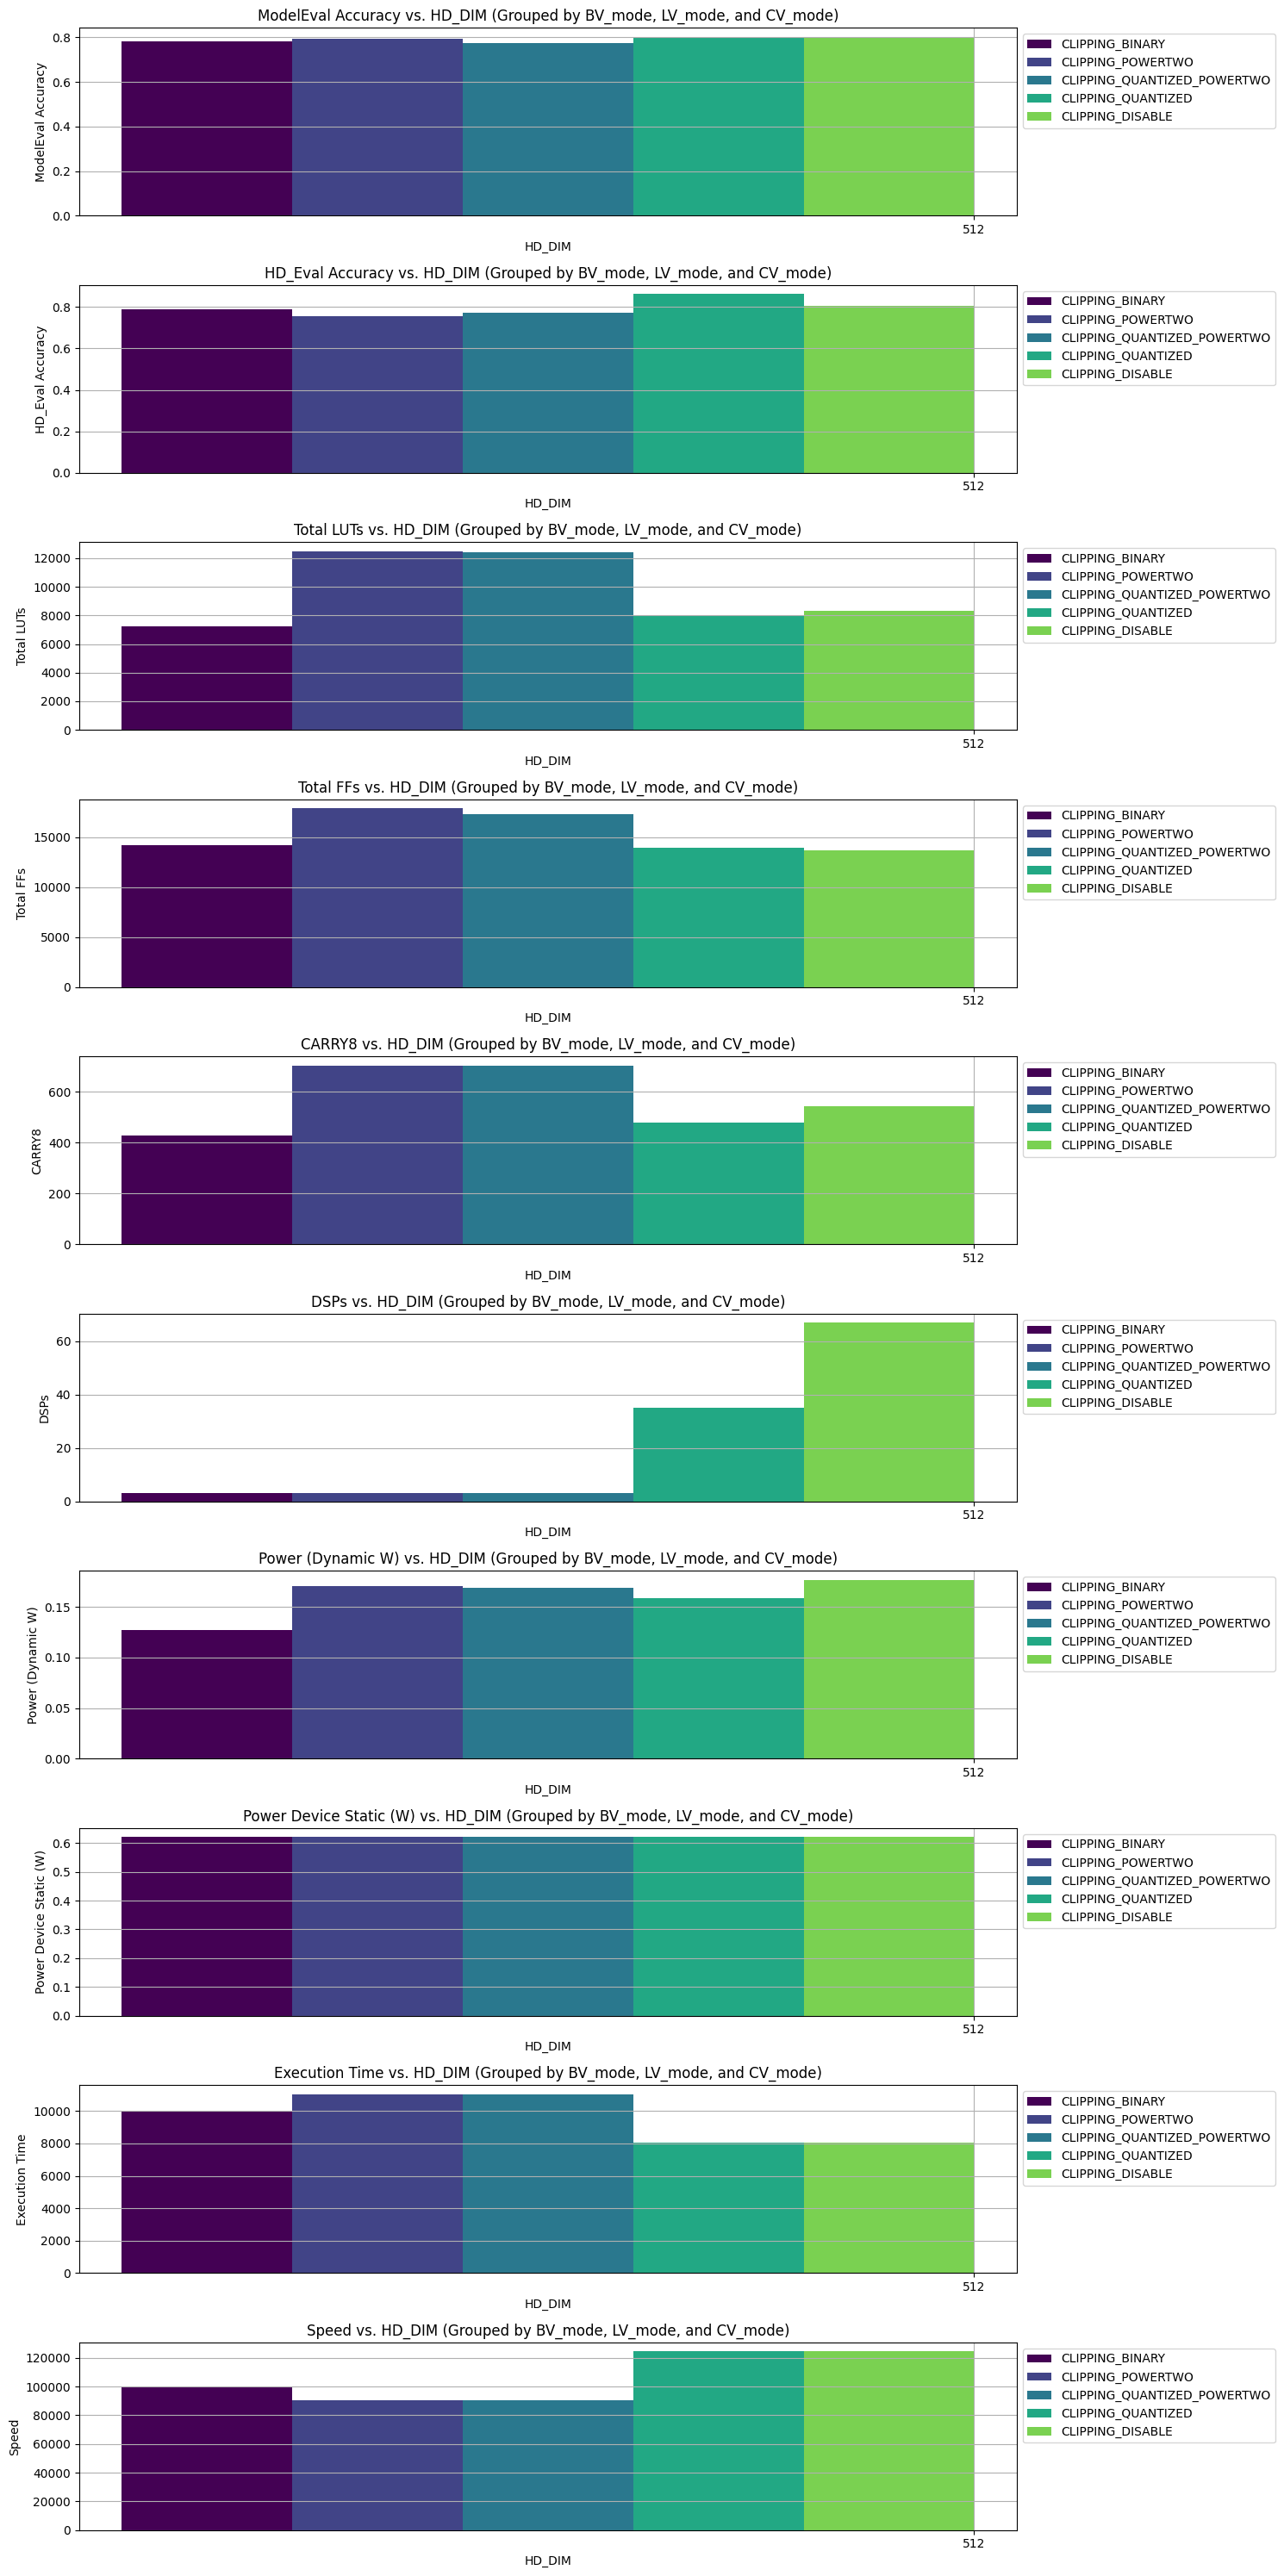

In [11]:
# Plot
report_test18=np.load("./rep/tmp/test_type_clipping_similarity/test_type_clipping_similarity.npy", allow_pickle=True)
tests.plot_test_type_clipping_similarity(report_test18)

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
TEST 19: HV_type vs similarities vs clipping
    
</div>


Test description:
Verifying the effect of different cllipping and similarities measures on binary and bipolar HDC model, varying the HD_DIM. The frame is keep constant.
Explored ranges:
- HD_DIM: [Binary, Bipolar]
- Similarity measure:
    - Hamming Distance
    - Dot Product
    - Cosine similarity
- clipping: [binary, disable]

Note: We dont test the following cases:
          - Clipping disable and hamming distance
          - Clipping enable, bipolar HV and hamming distance


In [7]:
# Explored space:
hvtype_range  = ["BINARY", "BIPOLAR"]
sim_range     = ["SIMI_HAM", "SIMI_DPROD", "SIMI_COS"]
clip_range    = ["CLIPPING_BINARY", "CLIPPING_DISABLE"]

# Test
report_test19 = tests.test_type_clipping_similarity(aeneas, hvtype_range, clip_range, sim_range)
default_config()

TypeError: collect_data() missing 1 required positional argument: 'run_sw_model'

In [ ]:
# Plot
tests.plot_test_type_clipping_similarity(report_test19)


_____
_____
_____



<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
TEST 20: CARDIO DATASET <a class="anchor" id="test_20"></a>
    
</div>


In [8]:
# Test
sw_train=1 # we dont want to run again the train
cardio_test = tests.test_dataset_cardio(aeneas,sw_train)

# Saving data as a pickle file
import pickle
pickle_path = 'C:/Users/disa/Desktop/FINAL DATASET TESTS/cardio_test.pkl'
with open(pickle_path, 'wb') as file:
    pickle.dump(cardio_test, file)

Running sw model...
------------------
HDC model:
Problem type: 0
Dataset: CARDIO
HV dimensionality: 512
HV data type: 0
HV mode: 0
HV level type: 0
HV level length: 10
HV similarity method: 0
HV Encoding method: 1
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 0
N-gram: 0
N-gram size: 1
Retrain: 1
Epochs: 50
Learning rate: 100
Learning rate decay: 1
Beta learning rate: 3
------------------

-1  :  (0, 0)
0  :  (1, 1)
1  :  (2, 3)
2  :  (4, 6)
3  :  (7, 12)
4  :  (13, 24)
5  :  (25, 48)
6  :  (49, 64)
Classification problem
Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
------------------
Testing procedure:
Progress: 10.0 % ---> accuracy: 83.01886792452831 %
Progress

Progress: 60.0 % ---> accuracy: 82.38993710691824 %
Progress: 70.0 % ---> accuracy: 82.47978436657682 %
Progress: 80.0 % ---> accuracy: 84.19811320754717 %
Progress: 90.0 % ---> accuracy: 84.27672955974843 %
Progress: 100.0 % ---> accuracy: 84.15094339622641 %


Accuracy: 84.02255639097744 %
Epoch 13 finished --> Corrections: 258 Accuracy: 84.02255639097744 %
Accuracy not improved --> Previous Accuracy: 85.71428571428571 New accuracy: 84.02255639097744 %
Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
Progress: 10.0 % ---> accuracy: 84.90566037735849 %
Progress: 20.0 % ---> accuracy: 84.90566037735849 %
Progress: 30.0 % ---> accuracy: 83.64779874213836 %
Progress: 40.0 % ---> accuracy:

Progress: 40.0 % ---> accuracy: 84.90566037735849 %
Progress: 50.0 % ---> accuracy: 83.77358490566037 %
Progress: 60.0 % ---> accuracy: 83.64779874213836 %
Progress: 70.0 % ---> accuracy: 83.28840970350404 %
Progress: 80.0 % ---> accuracy: 84.90566037735849 %
Progress: 90.0 % ---> accuracy: 85.11530398322851 %
Progress: 100.0 % ---> accuracy: 84.71698113207547 %


Accuracy: 84.58646616541354 %
Epoch 28 finished --> Corrections: 217 Accuracy: 84.58646616541354 %
Accuracy not improved --> Previous Accuracy: 89.66165413533835 New accuracy: 84.58646616541354 %
Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
Progress: 10.0 % ---> accuracy: 81.13207547169812 %
Progress: 20.0 % ---> accuracy:

Running HW model...


In [11]:
import pickle
pickle_path = 'C:/Users/disa/Desktop/FINAL DATASET TESTS/cardio_test.pkl'
# Load the data from the pickle file
with open(pickle_path, 'rb') as file:
    cardio_test = pickle.load(file)

# Now loaded_data contains your data
print(cardio_test)

[{'ModelResults': None, 'ModelEval': {'accuracy': 0.9041353383458647, 'precision': 0.8477489020042211, 'recall': 0.7987308039747063, 'f1_score': 0.8214326575481877, 'roc_auc': 0.8528633894061328, 'confusion_matrix': [[395, 13, 2], [22, 47, 3], [6, 5, 39]]}, 'HD_Eval': {'accuracy': 0.772556, 'precision': 0.590709, 'recall': 0.337963, 'f1_score': 0.299604, 'confusion_matrix': [[410, 0, 0], [71, 1, 0], [50, 0, 0]]}, 'ResourceUtility': {'LUT as Logic': 12849, 'LUT as Memory': 202, 'LUT as Distributed RAM': 2, 'LUT as Shift Register': 200, 'CLB Registers': 10020, 'Register as Flip Flop': 10020, 'Register as Latch': 0, 'CARRY8': 1198, 'DSPs': 81, 'Total LUTs': 13253, 'Total FF': 20040}, 'PowerReport': {'Dynamic (W)': 0.198, 'Device Static (W)': 0.621}, 'TimingReport': 90190.0, 'Speed': 11087.70373655616}]


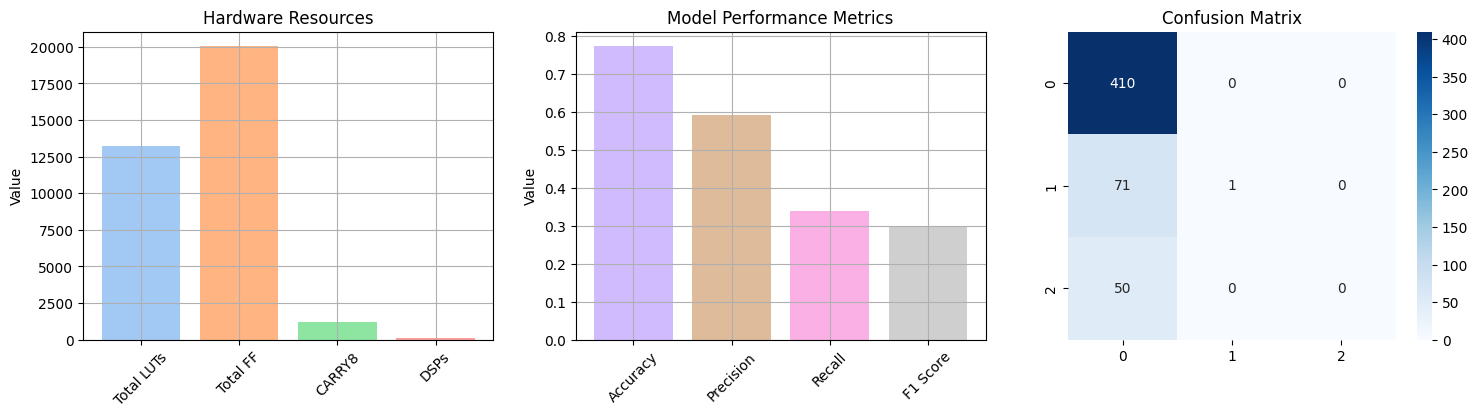

In [12]:
tests.dataset_test_plot(cardio_test)

-----------

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
TEST 21: EMG DATASET <a class="anchor" id="test_21"></a>
    
</div>


In [5]:
# Test
sw_train=0 # we dont want to run again the train
emg_test = tests.test_dataset_emg(aeneas,sw_train)

# Saving data as a pickle file
import pickle
pickle_path = 'C:/Users/disa/Desktop/FINAL DATASET TESTS/emg_test.pkl'
with open(pickle_path, 'wb') as file:
    pickle.dump(emg_test, file)

Running HW model...
Simulation finished...running synthesis


[{'HD_Eval': {'accuracy': 0.947987, 'precision': 0.917103, 'recall': 0.963434, 'f1_score': 0.934924, 'confusion_matrix': [[85078, 65, 4187, 16, 1708], [0, 13504, 0, 0, 383], [0, 0, 13930, 0, 0], [369, 8, 666, 14803, 22], [0, 0, 317, 0, 13771]]}, 'ResourceUtility': {'LUT as Logic': 2994, 'LUT as Memory': 1, 'LUT as Distributed RAM': 1, 'LUT as Shift Register': 0, 'CLB Registers': 3308, 'Register as Flip Flop': 3308, 'Register as Latch': 0, 'CARRY8': 264, 'DSPs': 0, 'Total LUTs': 2996, 'Total FF': 6616}, 'PowerReport': {'Dynamic (W)': 0.006, 'Device Static (W)': 0.62}, 'TimingReport': 310633.3333333333, 'Speed': 3219.229531065565}]


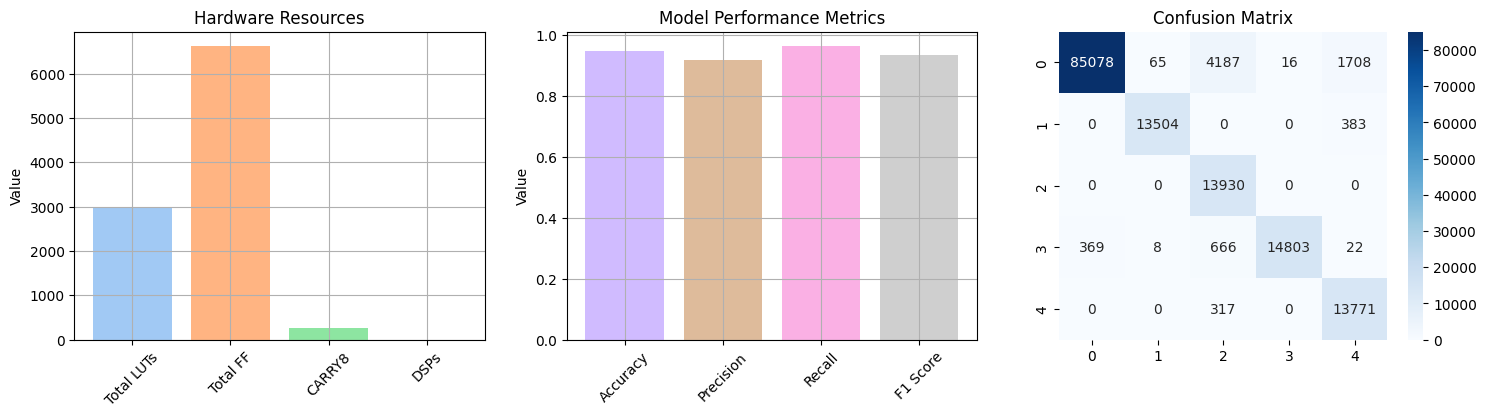

In [6]:
import pickle
pickle_path = 'C:/Users/disa/Desktop/FINAL DATASET TESTS/emg_test.pkl'
# Load the data from the pickle file
with open(pickle_path, 'rb') as file:
    emg_test = pickle.load(file)

print(emg_test)

tests.dataset_test_plot(emg_test)

-----------

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
TEST 22: HEPTA DATASET <a class="anchor" id="test_22"></a>
    
</div>


In [25]:
# Test
sw_train=0 # we dont want to run again the train
hepta_test = tests.test_dataset_hepta(aeneas,sw_train)

# Saving data as a pickle file
import pickle
pickle_path = 'C:/Users/disa/Desktop/FINAL DATASET TESTS/hepta_test.pkl'
with open(pickle_path, 'wb') as file:
    pickle.dump(hepta_test, file)

Running HW model...


[{'HD_Eval': {'accuracy': 1, 'precision': 0, 'recall': 0, 'f1_score': 0, 'confusion_matrix': [[0, 32, 0, 0, 0, 0, 0], [0, 0, 30, 0, 0, 0, 0], [30, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 30, 0, 0], [0, 0, 0, 0, 0, 0, 30], [0, 0, 0, 0, 0, 30, 0], [0, 0, 0, 30, 0, 0, 0]]}, 'ResourceUtility': {'LUT as Logic': 13304, 'LUT as Memory': 393, 'LUT as Distributed RAM': 64, 'LUT as Shift Register': 329, 'CLB Registers': 9768, 'Register as Flip Flop': 9768, 'Register as Latch': 0, 'CARRY8': 1004, 'DSPs': 97, 'Total LUTs': 14090, 'Total FF': 19536}, 'PowerReport': {'Dynamic (W)': 0.161, 'Device Static (W)': 0.621}, 'TimingReport': 12493.333333333334, 'Speed': 80042.68943436499}]


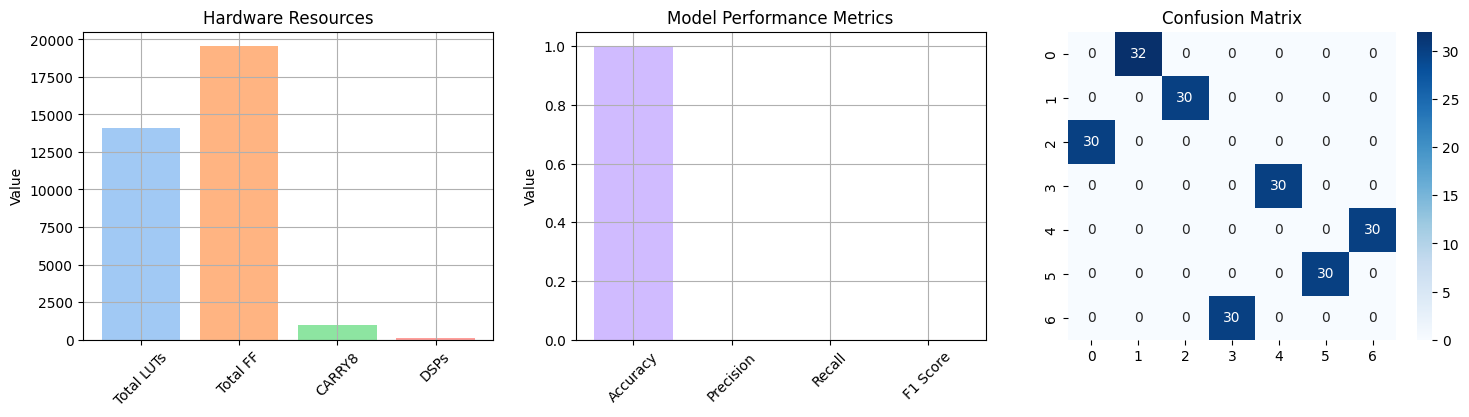

In [27]:
import pickle
pickle_path = 'C:/Users/disa/Desktop/FINAL DATASET TESTS/hepta_test.pkl'
# Load the data from the pickle file
with open(pickle_path, 'rb') as file:
    hepta_test = pickle.load(file)

print(hepta_test)
tests.dataset_test_plot(hepta_test)

-----------

<div style="background-color: #4CAF50; padding: 10px 15px; margin: 5px 0; border-radius: 5px; color: white; font-size: 24px; font-weight: bold;">
TEST 23: boston DATASET <a class="anchor" id="test_23"></a>
    
</div>


In [9]:
# Test
sw_train=0 # we dont want to run again the train
boston_test = tests.test_dataset_boston(aeneas,sw_train)

# Saving data as a pickle file
import pickle
pickle_path = 'C:/Users/disa/Desktop/FINAL DATASET TESTS/boston_test.pkl'
with open(pickle_path, 'wb') as file:
    pickle.dump(boston_test, file)

Running HW model...


In [18]:
import pickle
pickle_path = 'C:/Users/disa/Desktop/FINAL DATASET TESTS/boston_test.pkl'
# Load the data from the pickle file
with open(pickle_path, 'rb') as file:
    boston_test = pickle.load(file)
    
boston_test[0]['HD_Eval']['MSE']=boston_test[0]['HD_Eval']['MSE']/ 100
boston_test

[{'HD_Eval': {'MSE': 28.7973},
  'ResourceUtility': {'LUT as Logic': 4330,
   'LUT as Memory': 0,
   'CLB Registers': 2400,
   'Register as Flip Flop': 2400,
   'Register as Latch': 0,
   'CARRY8': 549,
   'DSPs': 0,
   'Total LUTs': 4330,
   'Total FF': 4800},
  'PowerReport': {'Dynamic (W)': 0.03, 'Device Static (W)': 0.62},
  'TimingReport': 180380.0,
  'Speed': 5543.85186827808}]

[{'HD_Eval': {'MSE': 28.7973}, 'ResourceUtility': {'LUT as Logic': 4330, 'LUT as Memory': 0, 'CLB Registers': 2400, 'Register as Flip Flop': 2400, 'Register as Latch': 0, 'CARRY8': 549, 'DSPs': 0, 'Total LUTs': 4330, 'Total FF': 4800}, 'PowerReport': {'Dynamic (W)': 0.03, 'Device Static (W)': 0.62}, 'TimingReport': 180380.0, 'Speed': 5543.85186827808}]


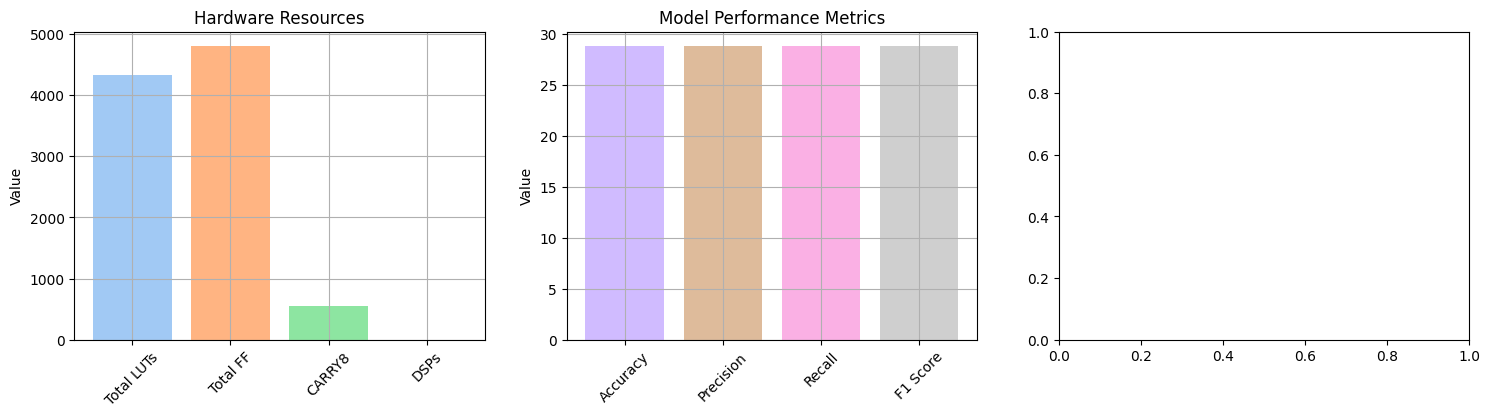

In [19]:
print(boston_test)
tests.dataset_test_plot(boston_test, classification=0)